# 14장 서포트 벡터 머신

자료 출처: [ISLP (An Introduction to Statistical Learning with Applications in Python)](https://www.statlearning.com/)

## 14.1 소개

머신러닝에서 **서포트 벡터 머신**(SVM: support vector machine)은 분류(classification) 문제에 사용되는 지도학습 기법이다. 1990년대 중반 컴퓨터 사이언스 쪽에서 개발된 것으로 AT&T Bell Laboratories에서 Vladimir Vapnik이 동료들과 함께 개발했다(Boser et al., 1992; Guyon et al., 1993; Cortes and Vapnik, 1995; Vapnik et al., 1997). 

### ChatGPT Q&A

>**서포트 벡터 머신(SVM: support vector machine)의 역사에 대해 간략히 알려줘.**

---

>서포트 벡터 머신(SVM, Support Vector Machines)은 분류, 회귀 및 이상치 탐지에 사용되는 강력한 지도 학습 기반의 머신러닝 모델 중 하나입니다. SVM의 기본 원리는 데이터를 고차원 공간에 매핑하고, 이 공간에서 최적의 분리 경계(결정 경계)를 찾아내어 두 클래스를 분리하는 것입니다. 이 결정 경계는 서포트 벡터라고 하는 가장 가까운 훈련 데이터 포인트에 의해 결정됩니다.
>
>**역사적 배경**
>
>- **1960년대 초:** SVM의 초기 아이디어는 Vladimir N. Vapnik과 Alexey Ya. Chervonenkis에 의해 소개되었습니다. 이들은 처음에 선형 분류기에 관한 연구를 수행하며, "일반화 이론"에 대한 기초를 마련했습니다.
>
>- **1992년:** Bernhard E. Boser, Isabelle M. Guyon, 그리고 Vladimir N. Vapnik은 커널 트릭을 사용하여 비선형 분류 문제를 해결할 수 있는 방법을 제안했습니다. 이 커널 트릭은 고차원 공간에서의 데이터 매핑을 통해 비선형 문제를 선형적으로 분리 가능하게 만들어 줍니다.
>
>- **1995년:** Corinna Cortes와 Vapnik은 현재 우리가 알고 있는 형태의 SVM, 즉 소프트 마진(Soft Margin) SVM을 제안하여, 데이터가 선형적으로 완벽하게 분리되지 않는 경우에도 모델이 잘 작동하도록 했습니다. 이는 오류를 어느 정도 허용하면서도 최대 마진을 찾는 방법을 제시했습니다.
>
>**발전과 활용**
>
>SVM은 그 이후로 다양한 분야에서 널리 사용되기 시작했습니다. 특히, 고차원 데이터에 대한 분류와 회귀 문제에서 강력한 성능을 발휘합니다. 금융, 바이오인포매틱스, 텍스트 분류, 이미지 인식 등 다양한 분야에서 SVM이 활용되고 있습니다.
>
>SVM의 성공은 고차원 데이터에서도 잘 작동하고, 과적합(overfitting)을 방지하는 능력에 기인합니다. 또한, 커널 트릭을 사용하여 비선형 문제를 해결할 수 있는 유연성 덕분에 많은 연구자와 개발자들에게 선호되는 모델 중 하나가 되었습니다.
>
>**현재**
>
>머신러닝과 인공지능 기술의 급속한 발전에도 불구하고, SVM은 여전히 중요한 도구로 남아 있습니다. 그러나 딥러닝과 같은 다른 기술들이 특정 문제에 있어 더 나은 성능을 보이는 경우도 많아, 현대의 머신러닝 문제를 해결하기 위한 여러 도구 중 하나로 사용됩니다.

### 기본 아이디어

기본 아이디어는 아주 간단하고 직관적이다. 쉬운 예로 아래 그림과 같이 반응변수의 범주(**클래스**)가 두 개(검은색과 하얀색)만 있는 경우를 생각해보자. 여기에는 총 16개의 훈련 관측(training observations)이 있다. 절반은 검은색이고, 나머지 절반은 하얀색이다. 이런 상황에서 어떤 (테스트) 관측이 주어졌을 때, 그것을 검은색으로 분류할지, 아니면 하얀색으로 분류할지, 그 규칙 즉 분류기(classifier)을 만들려고 한다. 그림에는 ${\rm H_1}$, ${\rm H_2}$, ${\rm H_3}$라는 3개의 분류기가 나와 있다. 우선 ${\rm H_1}$은 두 클래스를 제대로 분류조차 하지 못하기 때문에 (최소한 이 그림과 같은 상황에서는) 분류기로서 별로 고려할 만한 대상이 아니다. 문제는 ${\rm H_2}$와 ${\rm H_3}$ 중에서 어느 쪽이 더 낫냐는 것인데, SVM이 제안하는 분류기는 ${\rm H_3}$이다. 왜냐하면 두 클래스를 올바로 분류했다는 점에서는 두 분류기가 동일하나, ${\rm H_3}$가 ${\rm H_2}$에 비해 두 클래스 사이의 간격(그림에서 가는 점선으로 표시)이 훨씬 크다는 점에서 분류기로서 더 바람직하다는 것이다. 

요컨대 SVM은 훈련 관측을 공간의 포인트에 매핑하여 **두 클래스 사이의 간격을 최대화**하는 방식으로 분류기를 만드는 것이 핵심 내용이다. 그런 다음 새로운 관측이 주어지면, 이를 동일한 공간에 매핑하여 해당 분류기의 어느 쪽에 속하는지에 따라 클래스를 예측한다. 

![기본 아이디어](https://raw.githubusercontent.com/pilsunchoi/images/main/14-1.png)

- 그림 출처: Wikipedia, "[Support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine)".



SVM은 분류 문제를 처리하기 위해 개발되었지만, 회귀 문제에도 적용할 수 있다. **서포트 벡터 회귀**(SVR: support vector regression)가 그것이다. 또한 데이터에 레이블이 지정되지 않은 비지도학습에도 사용될 수 있는데, 소위 **서포트 벡터 클러스터링**(support vector clustering) 기법으로서 서포트 벡터 통계학을 적용하여 레이블이 지정되지 않은 데이터를 군집화하는 기법이다.

1절에서는 우선 **최대 마진 분류기**(maximal margin classifier)라는 가장 간단하고 직관적인 분류기를 먼저 다룬다. 이를 일반화시킨 것이 SVM이다. 최대마진 분류기는 단순하고 직관적이지만 대부분의 데이터세트에는 적용이 안된다. 왜냐하면 (위 그림 예처럼) 클래스를 선형 경계(linear boundary)로 **완전히 분리**할 수 있어야 하는데, 실제 데이터가 항상 그런 상황으로 주어지는 것은 아니기 때문이다. 2절에서 우리는 최대 마진 분류기를 발전시킨 **서포트 벡터 분류기**(support vector classifier)를 소개한다. 3절에서 비로소 서포트 벡터 분류기를 비선형(non-linear) 경계까지 추가로 확장시킨 **서포트 벡터 머신**(SVM)에 대한 설명이 나온다. 3절까지는 클래스가 두 개만 있는 이항(binary) 분류를 다룬다. 4절에서 우리는 클래스가 두 개보다 많은 경우에 SVM을 어떻게 적용하는지에 대해 논의한다. 

사람들은 종종 위에서 언급한 세 가지 분류기, 즉 최대 마진 분류기, 서포트 벡터 분류기, 서포트 벡터 머신을 전부 합쳐 "서포트 벡터 머신"이라고 포괄적으로 칭한다. 그러나 여기에서는 혼동을 피하기 위해 이 세 가지 개념을 주의 깊게 구분하기로 한다.

## 14.2 최대 마진 분류기

### 초평면이란?

서포트 벡터 분류기를 이해하기 위해서는 우선 **초평면**(hyperplane)과 **최적 분리 초평면**(optimal separating hyperplane)의 개념을 이해해야 한다. $p$차원 공간에서 **초평면은 해당 공간을 두 개로 나누는 평평한 부분공간**(flat subspace)으로 정의된다. 예를 들어 2차원에서 초평면은 평평한 1차원의 부분공간, 즉 직선이다.(위 도입 부분의 그림 예에서 ${\rm H_1}$, ${\rm H_2}$, ${\rm H_3}$가 2차원에서의 초평면들이다.) 그리고 3차원에서 초평면은 평평한 2차원 부분공간, 즉 평면이다. 3차원을 넘으면 초평면을 시각화하는 것은 어렵지만, $(p − 1)$ 차원에서의 평평한 부분공간이라는 개념은 여전히 적용된다. 요컨대 $p$차원 공간에서 초평면은 $(p - 1)$차원의 평평한 부분공간이다.

초평면은 수식으로 간단히 표현할 수 있다. 가장 간단한 예로 $(X_1,X_2)$의 2차원에서 초평면은 다음 식으로 정의된다.

$$ 
\beta_0  + \beta_1X_1 + \beta_2X_2 = 0 \tag{14.1} 
$$ 

여기에서 $\beta_0$, $\beta_1$, $\beta_2$는 파라미터들이다. 위 식은 $(X_1,X_2)$의 2차원 공간에서 어떤 직선을 나타낸다. 이미 언급했듯이 2차원 평면에서 초평면은 어떤 직선을 의미하며, 해당 초평면이 구체적으로 어떤 직선인지는 $\beta_0$, $\beta_1$, $\beta_2$에 의해 결정된다.

식 14.1을 $p$차원으로 쉽게 확장할 수 있다. 즉 $p$차원 공간에서 초평면은 다음과 같이 정의된다.

$$ 
\beta_0  + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p = 0 \tag{14.2} 
$$ 

$p$차원 공간에서 점 $X = (X_1,X_2, ... ,X_p)^T$가 식 14.2를 충족하면 $X$는 해당 초평면 상에 있는 것을 의미하고, $X$가 식 14.2를 만족하지 않으면 $X$는 해당 초평면 상에 있지 않다는 것을 의미한다. 가령 다음과 같이 식 14.2를 만족하지 않는다고 해보자. 

$$ 
\beta_0  + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p > 0 \tag{14.3} 
$$ 

이 경우에는 $X$가 초평면 위가 아니라 초평면에서 벗어난 어느 한쪽에 있음을 의미한다. 이때 만약 다음과 같다면, $X$가 이번에는 위와는 반대쪽에 있게 된다. 

$$ 
\beta_0  + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p < 0 \tag{14.4} 
$$ 

따라서 초평면은 $p$차원 공간을 두 개로 나누는 것이다. 아래 그림 14.1에 나와 있는 직선이 2차원 공간에서 초평면을 그린 것이다. 

**그림 14.1.** 초평면 $1 + 2X_1 + 3X_2 = 0$이 표시돼 있다. 파란색 영역은
$1 + 2X_1 + 3X_2 > 0$인 점의 집합이고, 보라색 영역은 $1 + 2X_1 + 3X_2 < 0$인 점의 집합이다.

![초평면](https://raw.githubusercontent.com/pilsunchoi/images/main/14-2.png)

- 그림 출처: ISLP, FIGURE 9.1

### 분리 초평면을 사용한 분류

다음과 같이 $p$개의 변수와 $n$개의 관측으로 구성된 예측변수(또는 특성) 데이터 $X$를 생각해보자. 즉 $X$는 $p$차원 공간에서 $n$개의 관측을 가진 $n \times p$ 데이터 행렬이다. 

$$
\begin{equation} \tag{14.5}
x_1 = \begin{pmatrix} x_{11} \\ \vdots \\ x_{1p} \end{pmatrix}, ~\cdots~, x_n = \begin{pmatrix} x_{n1} \\ \vdots \\ x_{np} \end{pmatrix}
\end{equation}
$$

데이터세트의 모든 관측은 $-1$과 $1$의 두 클래스 중 어느 하나에 속한다고 하자. 즉 반응 $y$는 $y_1, . . . , y_n \in \{−1, 1\}$이다. $X$와 $y$는 훈련 데이터세트이고, 우리는 또한 $x^∗ = (x^∗_1 . . . x^∗_p)^T$의 테스트 관측을 가지고 있다. 이 상황에서 우리의 목표는 훈련 데이터를 기반으로 테스트 관측의 클래스를 최대한 올바르게 분류하는 것이다. 이를 수행하는 분류기로서 우리는 이미 로지스틱 회귀(logistic regression), 분류 트리(classification tree), 배깅(bagging), 부스팅(boosting) 등 여러 접근 방식을 살펴봤는데, 이 장에서는 서포트 벡터 머신이라는 새로운 기법을 다룬다. 이를 위해 먼저 분리 초평면의 개념부터 생각해보자.

훈련 관측을 클래스 레이블 별로 **완벽하게 분리**하는 초평면을 **분리 초평면**(separating hyperplane)이라고 한다. 아래 그림 14.2의 왼쪽 패널에 세 개의 분리 초평면 예가 나와 있다. 파란색과 보라색 두 개의 클래스가 있는데, 파란색 관측은 $y_i = 1$, 그리고 보라색 관측은 $y_i = −1$로 숫자(레이블)를 부여해보자. 이 상황에서 $\beta_0  + \beta_1X_1 + \beta_2X_2 = 0$이 분리 초평면이라면, 그것은 다음과 같은 성질을 갖는다.

$$
\beta_0 + \beta_1x_{i1} + \beta_2x_{i2}>0~~~~{\rm if}~y_i=1~~\tag{14.6}
$$

$$
\beta_0 + \beta_1x_{i1} + \beta_2x_{i2}<0~~~~{\rm if}~y_i=-1 \tag{14.7}
$$

위 두 개의 식을 간단히 아래와 같은 하나의 식으로 표현할 수도 있다. 즉, 분리 초평면을 식으로 정의하면, 모든 $i = 1,..., n$에 대해 다음과 같은 성질을 갖는 초평면을 말한다.

$$
y_i(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2})>0 \tag{14.8}
$$

분리 초평면이 존재하는 경우, 이를 사용한 분류가 가능한데, 테스트 관측이 초평면의 어느 쪽에 위치하느냐에 따라 클래스를 할당하면 된다. 그림 14.2의 오른쪽 패널은 이러한 분류기의 예를 보여준다. 즉, $f(x^*) = \beta_0+\beta_1x^*_1 +\beta_2x^*_2$의 부호를 기반으로 테스트 관측 $x^*$를 분류하는 것으로서, $f(x^*)$가 양수이면 테스트 관측을 파란색 클래스에 할당하고, $f(x^*)$가 음수이면 보라색 클래스에 할당한다. 이때 $f(x^*)$의 부호뿐만 아니라 "크기"도 정보로 활용할 수 있다. 즉 $f(x^*)$가 0에서 **멀리** 떨어져 있으면 $x^*$가 초평면에서 멀리 떨어져 있음을 의미하므로 $x^*$에 대한 클래스 할당에 대해 **더 확신**할 수 있다. 반면에 $f(x^*)$가 0에 가까우면 $x^*$는 초평면 근처에 있으므로 $x^*$에 대한 클래스 할당에 대해 덜 확신한다. 그림 14.2에서 볼 수 있듯이 분리 초평면을 기반으로 하는 분류기는 당연히 **선형**(linear)의 결정 경계(decision boundary)를 제공한다.

**그림 14.2.** 왼쪽: $X_1$과 $X_2$ 두 개의 변수가 있고, 파란색과 보라색으로 표시된 두 가지 관측 클래스가 있다. 여러 가능한 초평면 중 세 개의 분리 초평면(separating hyperplane)이 직선으로 표시돼 있다. 오른쪽: 세 개의 분리 초평면 중 하나만 그려 놓았다. 파란색과 보라색 격자(grid)는 이 분리 초평면 분류기에 의해 만들어진 결정 규칙을 나타낸다. 파란색 격자에 속하는 테스트 관측은 파란색 클래스로 분류되고, 보라색 격자에 속하는 테스트 관측은 보라색 클래스로 분류된다.

![분리 초평면](https://raw.githubusercontent.com/pilsunchoi/images/main/14-3.png)

- 그림 출처: ISLP, FIGURE 9.2

### 최대 마진 분류기

일반적으로 초평면을 사용하여 데이터를 완벽하게 분리할 수 있다면, 그러한 초평면은 하나만 있는 것이 아니라 여러 개 존재할 것이다. 왜냐하면 주어진 분리 초평면을 위나 아래로 약간 이동하거나 회전시킴으로써 또 다른 분리 초평면을 얻을 수 있기 때문이다.(그림 14.2의 왼쪽 패널 참조.) 따라서 분리 초평면으로 분류기를 만들려면 **여러 분리 초평면 중 어느 것을 선택할지**를 결정해야 한다.

자연스러운 선택은 관측 **클래스를 가장 멀리 떼어 놓는** 분리 초평면, 소위 **최대 마진 초평면**(maximal margin hyperplane)이다. 여기서 **마진**(margin)이란 개념이 나왔는데, "클래스를 가장 멀리 떼어 놓는다"는 직관적 아이디어를 "마진"이라는 개념을 사용해 보다 엄격히 정의한 것이라고 보면 된다. 구체적으로 마진이란 각 훈련 관측들로부터 분리 초평면까지의 (수직) 거리 중에서 가장 짧은 거리로 정의된다. 아이디어는 간단하다. 분리 초평면 중 가장 좋은 것은 (직관적으로) 관측 클래스를 가장 멀리 떼어 놓는 것이다. 그런데 각 클래스의 어느 관측(들)을 기준으로 "가장 멀리 떨어진 것"을 평가할지에 있어서 초평면까지 거리가 가장 가까운 관측, 즉 마진에 해당하는 관측(만)을 기준으로 평가하자는 것이 최대 마진 초평면의 아이디어이다.  

최대 마진 초평면에 입각한 분류기를 **최대 마진 분류기**(maximal margin classifier)라고 부른다. $\beta_0, \beta_1,· · ·,\beta_p$가 최대 마진 초평면의 계수라면, 최대 마진 분류기는 $f(x^*) = \beta_0+\beta_1x^*_1 +· · ·+\beta_px^*_p$의 **부호**를 기반으로 테스트 관측 $x^*$를 분류한다. 즉 테스트 관측이 최대 마진 초평면의 어느쪽에 있느냐에 따라 해당 관측의 클래스를 분류하는 것이다. 

아래 그림 14.3은 위 그림 14.2의 데이터세트에 대한 최대 마진 초평면을 보여준다. 그림 14.2의 오른쪽 패널에 있는 초평면과 그림 14.3의 최대 마진 초평면을 비교하면, 후자가 마진(즉, 관측과 초평면 사이의 최소 거리)을 더 크게 만든다는 것을 알 수 있다. 달리 표현하면, 최대 마진 초평면은 두 클래스 사이에 삽입할 수 있는 가장 넓은 "슬래브(slab: 판)"의 중간선을 나타낸다.

아래 그림 14.3을 살펴보면 3개의 훈련 관측 포인트가 최대 마진 초평면과 동일 거리에 있어 마진(의 폭)을 나타내는 점선 위에 놓여 있음을 알 수 있다. 이들 3개의 **관측**은 수학적 용어를 사용하면 3개의 **벡터**로서, 최대 마진 초평면을 직접적으로 결정한다. 즉 **서포트**(support)한다. 그래서 마진 위에 놓인 이들 3개 관측을 **서포트 벡터**라고 부른다. 흥미롭게도 최대 마진 초평면은 서포트 벡터에만 직접적으로 의존하며, 다른 관측에는 의존하지 않는다. 왜냐하면 3개의 서포트 벡터 중 어느 하나라도 위치가 약간 바뀌면 최대 마진 초평면 역시 모양이 달라지지만, 서포트 벡터를 제외한 다른 관측의 이동은 그것이 점선으로 된 마진 경계를 넘지 않는 한, 분리 초평면에 영향을 미치지 않기 때문이다.

**그림 14.3.** 파란색과 보라색으로 표시된 두 가지 관측 클래스가 있다. 검은색 실선이 최대 마진 초평면이다. 마진은 실선에서 점선까지의 수직 거리이다. 점선에 있는 2개의 파란색 점과 1개의 보라색 점이 서포트 벡터이며 이 점에서 초평면까지의 거리, 즉 마진이 화살표로 표시돼 있다. 보라색과 파란색 격자(grid)는 이 최대 마진 분류기에 의해 만들어진 결정 규칙을 나타낸다.

![최대 마진 초평면](https://raw.githubusercontent.com/pilsunchoi/images/main/14-4.png)

- 그림 출처: ISLP, FIGURE 9.3

이제 최대 마진 초평면을 수식으로 정의해보자. 간단한 내용을 굳이 복잡한 수식으로 정리하는 이유는 이렇게 해야만 최대 마진 초평면의 개념을 보다 일반적인 상황(즉, 클래스의 완전 분리가 불가능한 경우 등)으로 확대해 나갈 수 있기 때문이다. 

$n$개의 훈련 관측 $x_1, . . . , x_n \in \Bbb R^p$ 및 클래스 레이블 $y_1, . . . , y_n \in \{−1, 1\}$이 있을 때, 최대 마진 초평면은 다음의 최적화 문제로 표현할 수 있다.

$$
\underset{ \beta_0, \beta_1,...,\beta_p,M} {\rm maximize }~~ M~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\tag{14.9}
$$
$$
{\rm subject~to} \sum_{j=1}^{p} \beta_{j}^2 = 1~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \tag{14.10}
$$
$$
y_i(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2}+· ··+\beta_px_{ip})\ge M,~~~~\forall i=1,...,n \tag{14.11}
$$

위 식 중에서 마지막에 있는 식 14.11의 제약 조건부터 보면, $M$이 양수인 경우 $y_i(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2}+· ··+\beta_px_{ip})\ge M$은 각 관측이 초평면의 올바른 쪽에 있어야 한다는 조건을 의미한다. 사실, 각 관측이 초평면의 올바른 쪽에 있기 위해서는 단순히 $y_i(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2}+· ··+\beta_px_{ip}) > 0$이면 된다. 여기에서 0 대신 양수 $M$을 사용할 경우, 각 관측은 그만큼 "여유있게" 초평면의 올바른 쪽에 있게 된다. 그 "여유"가 바로 마진이며, 식 14.9는 그 마진 $M$을 최대화한다는 것이다. 

위 식에서 $M$이 정확히 우리가 앞에서 정의한 마진이 되는 이유는 식 14.10 때문이다. 이 제약 조건, 즉 $
\sum_{j=1}^{p} \beta_{j}^2 = 1$ 하에서 $i$번째 관측에서 초평면까지의 수직 거리는 다음과 같이 된다는 것을 보일 수 있다.

$$y_i(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2}+· ··+\beta_px_{ip})$$

따라서 제약 조건 식 14.10 및 14.11은 각 관측이 초평면의 올바른 면에 있고, 관측에서 초평면까지의 수직 거리가 최소 $M$보다는 커야 한다는 것을 의미한다. 다시 말하면, 관측에서 초평면까지의 수직 거리 중 최소값이 $M$이 되는 것이다. 따라서 $M$은 초평면의 마진을 나타내고, 위의 최적화 문제는 마진 $M$을 최대화하는 $\beta_0, \beta_1,· · ·,\beta_p$를 선택하는 문제가 된다. 그것이 바로 최대 마진 초평면의 정의로서 위의 최적화 문제가 최대 마진 초평면을 찾는 문제임을 알 수 있다. 

### 분리 불가능한 케이스

분리 초평면이 존재하는 경우 최대 마진 분류기는 분류를 수행하는 매우 자연스러운 방법이다. 그러나 문제는 대부분의 데이터에 있어서 "분리" 초평면이 존재하지 않는다는 점이다. 이렇게 되면 당연히 최대 마진 분류기가 존재하지 않는다. 이 경우 최적화 문제 식 14.9-11에는 $M > 0$인 해가 없다. 

아래 그림 14.4에 예가 나와 있는데, 여기에서 2개 클래스를 완전히 분리하는 직선(즉 초평면)을 찾는 것은 불가능하다. 그러나 다음 절에서 바로 나오겠지만, 소위 소프트 마진(soft margin)을 사용하여 클래스를 (완전히는 아니더라도) "대부분" 분리하는 초평면을 생각해볼 수 있다. 이처럼 분리 초평면이 존재하지 않는 경우도 커버할 수 있도록 최대 마진 분류기를 일반화한 것이 서포트 벡터 분류기이다.

**그림 14.4.** 파란색과 보라색으로 표시된 두 가지 관측 클래스가 있다. 이 경우 두 클래스를 초평면으로 분리할 수 없으므로 최대 마진 분류기를 사용할 수 없다.

![분리 불가능한 케이스](https://raw.githubusercontent.com/pilsunchoi/images/main/14-5.png)

- 그림 출처: ISLP, FIGURE 9.4

## 14.3 서포트 벡터 분류기 

### 서포트 벡터 분류기의 개요

앞의 그림 14.4처럼 실제 데이터세트에서 두 클래스에 속하는 관측값이 초평면에 의해 완전 분리되는 경우는 많지 않을 것이다. 더구나 문제는 설사 분리 초평면이 존재하더라도 분리 초평면에 기반한 최대 마진 분류기가 반드시 바람직한 것은 아닐 수도 있다는 점이다. 분리 초평면에 기반한 분류기는 모든 훈련 관측을 완벽하게 분류하지만, 이것이 오히려 개별 관측에 너무 민감한 결과로 이어질 수 있다. 

그런 예가 아래 그림 14.5에 나와 있다. 여기에서 오른쪽 패널을 보면, 관측 포인트를 단 하나 추가했을 뿐인데 최대 마진 초평면이 기존의 점선에서 직선으로 모양이 크게 바뀌는 것을 알 수 있다. 더구나 새롭게 얻은 최대 마진 초평면은 그다지 만족스럽지 않아 보인다. 무엇보다 마진이 매우 작기 때문이다. 이것은 문제가 된다. 왜냐하면 앞에서 언급한 바와 같이 분리 초평면으로부터 관측까지의 거리는 관측이 올바르게 분류되었다는 확신의 척도로 볼 수 있는데 마진이 너무 작기 때문이다. 최대 마진 초평면이 단일 관측값의 변화에 극도로 민감하다는 사실은 그것이 훈련 데이터에 과적합되었을 수 있음을 시사한다.

**그림 14.5.** 왼쪽: 두 가지 클래스(파란색과 보라색)의 관측과 최대 마진 초평면이 나와 있다. 오른쪽: 기존의 최대 마진 초평면 아래쪽에 파란색 관측 포인트가 하나 추가됨으로써 최대 마진 초평면이 기존의 점선에서 직선으로 크게 바뀐다. 

![서포트 벡터 분류기의 개요](https://raw.githubusercontent.com/pilsunchoi/images/main/14-6.png)

- 그림 출처: ISLP, FIGURE 9.5

결국 이런 문제점을 감안하여 우리는 **두 클래스를 (일부러) 완벽하게 분리하지 않는** 초평면 기반 분류기를 생각해볼 필요가 있다. 대부분의 관측을 분류하는 데 도움이 된다면 일부 몇 개의 훈련 관측을 잘못 분류하는 것이 오히려 가치가 있을 수 있기 때문이다.

소프트 마진 분류기(soft margin classifier)라고도 하는 **서포트 벡터 분류기**(support vector classifier)가 이런 아이디어에 입각한 분류기다. 앞의 최대 마진 분류기는 모든 관측이 초평면은 물론이고 마진에 대해서도 올바른 쪽에 있도록 가장 큰 마진을 찾는 것인데 반해, 서포트 벡터 분류기는 일부 관측이 마진의 잘못된 쪽에 있거나 심지어 초평면의 잘못된 쪽에 있는 것을 허용한다. 마진이 일부 훈련 관측에 위반될 수 있다는 점에서 "소프트 마진"이라고 표현한다. 아래 그림 14.6의 왼쪽 패널에 예가 나와 있다. 대부분의 관측은 마진의 올바른 쪽에 있다. 그러나 일부 관측들이 마진의 잘못된 쪽에 있는 것을 알 수 있다.

관측은 마진의 잘못된 쪽뿐만 아니라 초평면의 잘못된 쪽에도 있을 수 있다. 사실 (완전)분리 초평면이 없는 경우에는 이러한 상황이 불가피하다. 그림 14.6의 오른쪽 패널이 그런 경우를 보여준다.

**그림 14.6.** 왼쪽: 서포트 벡터 분류기를 두 가지 데이터세트에 피팅한 결과이다. 초평면은 실선으로 표시되고, 마진은 점선으로 표시돼 있다. 보라색 관측을 보면, 관측 3, 4, 5, 6은 마진의 올바른 쪽에 있고, 관측 2는 마진 상에 있고, 관측 1은 마진의 잘못된 쪽에 있다. 파란색 관측의 경우, 관측 7과 10은 마진의 올바른 쪽에 있고, 관측 9는 마진 상에 있고, 관측 8은 마진의 잘못된 쪽에 있다. 초평면의 잘못된 쪽에 있는 관측은 없다. 오른쪽: 두 개의 추가 점(11 및 12)을 제외하고는 왼쪽 패널과 동일하다. 이들 두 관측은 마진의 잘못된 쪽에 있는 것은 물론이고 초평면에 대해서도 잘못된 쪽에 있다.

![두 가지 데이터세트에 피팅한 결과](https://raw.githubusercontent.com/pilsunchoi/images/main/14-7.png)

- 그림 출처: ISLP, FIGURE 9.6

### 서포트 벡터 분류기 세부 내용

서포트 벡터 분류기는 테스트 관측이 초평면의 어느 쪽에 있는지에 따라 클래스를 분류한다. 여기에서 초평면은 일부 관측을 잘못 분류하는 것을 허용한다는 점이 앞의 최대 마진 분류기와 다른 점이다. 서포트 벡터 초평면을 앞에서처럼 식으로 표현하면 다음과 같다.

$$
\underset{ \beta_0, \beta_1,...,\beta_p,~\epsilon_1,...,\epsilon_n,~M} {\rm maximize }~~ M ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\tag{14.12}
$$
$$
{\rm subject~to} \sum_{j=1}^{p} \beta_{j}^2 = 1 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \tag{14.13}
$$
$$
y_i(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2}+· ··+\beta_px_{ip})\ge M(1-\epsilon_i) \tag{14.14}
$$
$$
\epsilon_i \ge 0,~~ \sum_{i=1}^{n} \epsilon_{i} \le C ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\tag{14.15}
$$

여기에서 $C$는 0이거나 양수인 **조정 파라미터**(tuning parameter)이다. 앞에서와 마찬가지로 $M$은 마진이고, 우리는 이것을 최대한 크게 만들고자 한다. 또한 $\epsilon_1, . . . , \epsilon_n$은 개별 관측이 마진 또는 초평면의 잘못된 쪽에 있는 것을 얼마만큼 허용하는지를 규정하는 여유 변수(slack variable)이다. 일단 식 14.12-15에 의해 최적 초평면이 도출되면, 테스트 관측 $x^*$가 초평면의 어느 쪽에 놓여 있는지에 따라 클래스를 분류한다는 점은 앞과 동일하다. 즉, $f(x^*) = \beta_0+\beta_1x^*_1 +· · ·+\beta_px^*_p$의 부호에 따라 테스트 관측을 분류한다.

식 14.12-15의 배후에 있는 아이디어를 직관적으로 이해해보자. 우선, 여유 변수 $\epsilon_i$는 0이거나 0보다 큰 값을 가질 수 있는데, 그 값에 따라 초평면과 마진을 기준으로 각 관측이 어디에 있는지 그 위치가 결정된다. 일단 $\epsilon_i=0$이면, $i$번째 관측은 앞의 최대 마진 분류기에서 보았듯이 마진의 올바른 쪽에 있다. 반면 $\epsilon_i>0$이면, 마진의 잘못된 쪽에 있고, 이때 우리는 $i$번째 관측이 마진을 위반했다고 말한다. 만약 $\epsilon_i>1$이면, $i$번째 관측이 마진은 물론이고 초평면의 잘못된 쪽에 있다.

다음으로 조정 파라미터 $C$의 역할을 생각해보자. 식 14.15를 보면, $C$는 $\epsilon_i$의 합을 제한하는 역할을 한다. 따라서 바로 앞에서 생각해본 $\epsilon_i$의 역할을 감안할 때, $C$는 우리가 허용할 마진(및 초평면)에 대한 **위반의 수와 심각도**를 결정한다고 할 수 있다. 달리 표현하면, $C$는 $n$개의 관측이 마진을 위반할 수 있는 총 예산(budget)으로 생각할 수 있다. $C = 0$이면 마진 위반에 대한 예산이 전혀 없는 것을 의미하고, $\epsilon_1 = · · · = \epsilon_n = 0$이 된다. 이 경우 식 14.12–15는 앞의 최대 마진 초평면 최적화 문제(식 14.9-11)와 동일해진다. 이 특수한 경우를 제외한다면, 즉 $C > 0$의 경우에는, 일단 초평면의 잘못된 쪽에 $C$개 이상의 관측이 있을 수 없게 된다. 왜냐하면 관측이 초평면의 잘못된 쪽에 있다는 것은 $\epsilon_i>1$을 의미하는데, 식 14.15는 $\sum_{i=1}^{n} \epsilon_{i} \le C$를 요구하기 때문이다. 결국 **조정 파라미터 $C$가 커**(작아)**질수록 마진 위반에 대해 더**(덜) **관대해지며, 따라서 마진은 더 넓어**(좁아)**진다.** 예가 다음 그림 14.7에 나와 있다.

실제 데이터분석에서 $C$는 교차검증(cross-validation)을 통해 선택될 수 있다. 다른 조정 파라미터와 마찬가지로 $C$ 역시 통계적 학습 기법의 **편향-분산**(bias-variance) **상충**(trade-off) 관계를 규정한다. $C$를 아주 작게 하면 위반이 거의 발생하지 않는 좁은 마진을 찾게 된다. 이것은 데이터 피팅이 매우 좋은 분류기에 해당하기 때문에, 편향은 낮지만 분산은 높을 수 있다. 반면에 $C$가 커지면 마진이 더 넓어지고 더 많은 위반이 허용된다. 이것은 데이터 피팅 성과를 떨어뜨림으로써 편향이 커질 수 있지만, 그 대신 분산은 낮아질 수 있다. 

최적화 문제 식 14.12–15에는 매우 흥미로운 속성이 있다. 전체 관측 중에서 마진 상에 있거나 마진을 위반하는 관측만 초평면에 영향을 미친다는 점이다. 다시 말해, 마진의 올바른 쪽에 있는 관측은 서포트 벡터 분류기에 영향을 미치지 않는다! 이들은 (그 위치가 마진의 올바른 쪽으로만 유지된다면) 관측의 위치가 변경돼도 분류기는 전혀 영향을 받지 않는 것이다. 서포트 벡터 분류기에서는 (앞의 최대 마진 분류기와 약간 달리) 해당 클래스의 마진 상에 있거나 마진의 잘못된 쪽에 있는 관측을 서포트 벡터라고 하며, 이러한 관측들만 분류기에 영향을 미친다.

**그림 14.7.** 주어진 데이터세트에 대해 서포트 벡터 분류기를 이용하여 조정 파라미터 $C$에 대해 네 가지 다른 값을 사용하여 피팅했다. 왼쪽 상단 패널의 $C$값이 가장 크며, 그 다음이 오른쪽 상단, 왼쪽 하단, 오른쪽 하단 순이다. $C$가 클(작을)수록 관측이 마진의 잘못된 쪽에 있는 것에 대한 허용도(tolerance)가 커(작아)지므로 마진이 커(작아)진다. 

![네 가지 C로 피팅](https://raw.githubusercontent.com/pilsunchoi/images/main/14-8.png)

- 그림 출처: ISLP, FIGURE 9.7

서포트 벡터만 분류기에 영향을 미친다는 사실은 $C$가 서포트 벡터 분류기의 편향-분산 상충 관계를 규정한다는 앞의 설명과 일맥상통하다. 조정 파라미터 $C$가 크면 마진이 넓고, 그에 따라 많은 관측이 마진을 위반하므로 서포트 벡터가 많아진다. 초평면을 결정하는 데 관련된 관측이 많아지는 것이다. 위 그림 14.7의 왼쪽 상단 패널은 이 같은 경우를 보여준다. 이런 분류기는 (많은 관측이 서포트 벡터이기 때문에) 분산은 낮지만, 편향이 높아질 가능성이 있다. 대조적으로, $C$가 작으면 서포트 벡터가 더 적으므로 거기에서 도출된 분류기는 편향은 낮지만 분산이 높아질 가능성이 있다. 그림 14.7의 오른쪽 하단 패널이 이 경우에 속한다.

## 14.4 서포트 벡터 머신

### 비선형 결정 경계를 사용한 분류

두 클래스 간의 경계가 선형(linear)이라면, 앞 절의 서포트 벡터 분류기가 자연스러운 접근 방식이다. 그러나 실제로 우리는 **비선형 경계**에 때때로 직면한다. 예를 들어, 그림 14.8의 왼쪽 패널에 있는 데이터를 생각해보자. 서포트 벡터 분류기 또는 선형 분류기는 여기에서 제대로 작동하지 않을 것이 분명하다. 실제로 그림 14.8의 오른쪽 패널에 표시된 것이 서포트 벡터 분류기에 의한 피팅 결과인데 (훈련 관측에 대해서조차) 분류 성과가 매우 안 좋다는 것을 알 수 있다.

**그림 14.8.** 왼쪽: 관측값은 두 클래스로 나뉘며 둘 사이에는 비선형 경계가 있음을 알 수 있다. 오른쪽: 서포트 벡터 분류기를 사용할 경우, 선형 경계를 구하게 되고 결과적으로 분류 성과가 매우 안 좋다. 

![비선형 결정 경계를 사용한 분류](https://raw.githubusercontent.com/pilsunchoi/images/main/14-9.png)

- 그림 출처: ISLP, FIGURE 9.8

우리는 회귀 분석에서도 유사한 상황에 직면한 적이 있다. 예측변수와 반응 사이에 비선형 관계가 있을 때 선형 회귀의 예측 성능이 저하될 수 있는 것이다. 이러한 비선형성을 해결하기 위해 우리는 예측변수의 2차 및 3차 함수들을 사용하여 **특성 공간**(feature space)을 확대하는 시도를 했다. 서포트 벡터 분류기에 있어서도 예측변수의 2차, 3차, 그리고 고차 다항식(polynomial) 함수를 사용하여 특성 공간을 확장함으로써 유사한 방식으로 비선형 경계 문제를 해결할 수 있다. 예를 들어, 다음과 같은 $p$개 특성을 사용하여 서포트 벡터 분류기를 피팅하는 대신 

$$
X_1,X_2,...,X_p
$$

다음과 같이 각 변수의 2차 항을 포함시킴으로써 $2p$개의 특성을 사용하여 서포트 벡터 분류기를 피팅할 수 있다.

$$
X_1,X_1^2,X_2,X_2^2,...,X_p,X_p^2
$$

그러면 앞의 식 14.12-15는 다음과 같이 바뀌게 된다.

$$
\begin{equation} \tag{14.16}
\begin{aligned}
& \underset{\beta_0, \beta_{11}, \beta_{12}, ..., \beta_{p1}, \beta_{p2}, ~\epsilon_1, · · ·, \epsilon_n, ~M}{\rm maximize}~~ M \\
& {\rm subject~to}~~y_i \left( \beta_0 + \sum_{j=1}^{p} \beta_{j1} x_{ij} + \sum_{j=1}^{p} \beta_{j2} x_{ij}^2 \right) \ge M(1-\epsilon_i) \\
& \epsilon_i \ge 0,~~ \sum_{i=1}^{n} \epsilon_{i} \le C,~~ \sum_{j=1}^{p} \sum_{k=1}^{2} \beta_{jk}^2 = 1
\end{aligned}
\end{equation}
$$

사실 식 14.16에 의해 도출되는 결정 경계는 **확장된 특성 공간**에서는 여전히 **선형**이다. 그러나 확장된 공간이 아니라 **원래의 특성 공간**에서는 이 결정 경계가 **선형이 아니라** $q(x) = 0$ 형식이 된다. 여기서 $q$는 2차 다항식이고, 해는 일반적으로 비선형이다. 

2차 항뿐만 아니라 추가로 고차 다항식 항을 사용하거나, 또는 $X_jX_{j'}$($j \ne j'$) 형식의 상호작용(interaction) 항을 사용하여 특성 공간을 확장할 수도 있다. 또는 다항식이 아닌 다른 함수를 고려할 수도 있다. 이처럼 특성 공간을 확장할 수 있는 많은 방법이 있기 때문에 특성의 수가 엄청나게 많아질 수도 있고, 그러면 계산을 관리할 수 없게 된다. 다음에 소개할 서포트 벡터 머신을 사용하면 효율적인 계산으로 이어지는 방식으로 서포트 벡터 분류기의 특성 공간을 확장할 수 있다.

### 서포트 벡터 머신

서포트 벡터 머신(SVM)은 **커널(kernel)을 사용하여 특정 방식으로 서포트 벡터 분류기의 특성 공간을 확장**한 것이다. 핵심은 클래스 간의 비선형 경계를 수용하기 위해 특성 공간을 확장시킨다는 점으로서 아이디어 자체는 앞에서 이미 설명되었다. 단지 이를 효율적으로 실행(계산)하기 위해 커널을 사용하는 것이다. 

세부적으로 논의하지 않았지만, 앞의 서포트 벡터 분류기(식 14.12–15) 문제에 대한 솔루션은 (관측값 자체가 아니라) 관측값의 **내적**(inner product)만 포함한다. 두 개의 $r$-벡터 $a$와 $b$가 있을 때, 이들의 내적은 $⟨a, b⟩ = \sum_{i=1}^{r} a_ib_i$로 정의된다. 따라서 두 관측 $x_i$와 $x_{i'}$의 내적은 다음과 같다.

$$⟨x_i, x_{i'}⟩ = \sum_{j=1}^{p} x_{ij}x_{i'j} \tag{14.17}$$

앞의 서포트 벡터 분류기와 관련하여 다음과 같은 것을 보일 수 있다. 

첫째, 새로운 포인트 $x$와 각 훈련 포인트 $x_i$가 있을 때, $x$에 대한 선형 서포트 벡터 분류기는 다음과 같이 나타낼 수 있다.

$$
f(x) = \beta_0 + \sum_{i=1}^{n} \alpha_i⟨x, x_{i}⟩ \tag{14.18}
$$

여기서 파라미터 $\alpha_i~(i = 1, . . . ,n)$는 모든 훈련 관측당 하나씩, 총 $n$개가 존재한다. 그런데 훈련 관측이 서포트 벡터가 아닌 경우에는 $\alpha_i$ 값은 0이 된다. 즉 서포트 벡터에 대해서만 $\alpha_i$가 0이 아니다. 따라서 서포트 포인트들의 인덱스 모음을 $\mathcal S$로 표기하면, 위 식 14.18을 다음과 같이 다시 적을 수 있다.(이 식은 일반적으로 식 14.18보다 훨씬 적은 항을 포함한다.)

$$ f(x) = \beta_0 + \sum_{i \in \mathcal S} \alpha_i⟨x, x_{i}⟩ \tag{14.19} $$

둘째, 파라미터 $\alpha_i,...,\alpha_n$ 및 $\beta_0$을 추정하기 위해 우리가 필요로 하는 것은 모든 쌍의 훈련 관측 간의 내적 $⟨x_i, x_{i'}⟩$뿐이다.(총 $\binom{n}{2} = n(n − 1)/2$개의 내적이 있음.)

요약하자면, 선형 분류기 $f(x)$의 계수를 계산할 때, 우리에게 필요한 것은 훈련 관측 간의 내적뿐이다. 이 점에 착안하여 이제 서포트 벡터 분류기에 대한 솔루션 계산에서 내적(식 14.17)이 나타날 때마다 그것을 일반화한 다음 형식으로 그것을 대체하기로 한다. 

$$ K(x_i, x_{i'}) \tag{14.20} $$

여기서 $K$는 **커널**이라고 부르는 함수이다. 커널은 두 관측값의 유사성을 수량화하는 함수이다. 예를 들어, 커널이 다음과 같은 함수라면(즉 커널이 내적 함수라면), 이는 다름 아닌 서포트 벡터 분류기다. 

$$ K(x_i, x_{i'})=\sum_{j=1}^{p} x_{ij}x_{i'j} \tag{14.21} $$

서포트 벡터 분류기는 특성(feature)에 대해 선형이기 때문에 식 14.21을 **선형 커널**(linear kernel)이라고 부른다. 선형 커널 대신 다른 형식을 선택할 수 있다. 예를 들어, 내적 대신 다음과 같은 수량을 사용할 수 있다.

$$ K(x_i, x_{i'})=\left( 1+\sum_{j=1}^{p} x_{ij}x_{i'j} \right)^d \tag{14.22} $$

이것은 $d$차 **다항식 커널**(polynomial kernel of degree $d$)이라고 하며, 여기서 $d$는 양의 정수이다. 서포트 벡터 분류기 알고리즘에서 선형 커널 대신 이러한 비선형 커널을 사용하면 훨씬 더 유연한 결정 경계가 생성된다. 본질적으로 원래의 특성 공간이 아닌 더욱 고차원 공간에서 서포트 벡터 분류기를 피팅하는 것과 같다. 서포트 벡터 분류기가 식 14.22와 같은 비선형 커널과 결합될 때, 그 결과로 나온 분류기를 **서포트 벡터 머신**(SVM)이라고 한다. 이 경우 (비선형) 분류기는 다음과 같은 식이 된다. 

$$ f(x) = \beta_0 + \sum_{i \in \mathcal S} \alpha_i K(x, x_{i}) \tag{14.23} $$


아래 그림 14.9의 왼쪽 패널은 앞의 그림 14.8의 비선형 데이터에 다항식 커널을 사용한 SVM의 적용 예를 보여준다. 선형 서포트 벡터 분류기에 비해 피팅이 상당히 개선된 것을 알 수 있다.

식 14.22의 다항식 커널은 비선형 커널의 한 가지 예이고, 다른 대안도 많다. 또 다른 인기 있는 선택은 다음 형식을 취하는 **방사형 커널**(radial kernel) 이다.

$$ K(x_i, x_{i'})=\exp\left( -\gamma\sum_{j=1}^{p} (x_{ij}-x_{i'j})^2 \right) \tag{14.24} $$

여기에서 $\gamma$는 양의 상수이다. 그림 14.9의 오른쪽 패널은 동일한 비선형 데이터에 방사형 커널의 SVM을 적용한 예를 보여준다. 역시 두 클래스를 잘 분류하는 것을 알 수 있다.  

**그림 14.9.** 왼쪽: 앞의 그림 14.8의 비선형 데이터에 3차 다항식 커널을 사용한 SVM을 적용한 결과 훨씬 더 적절한 결정 규칙이 생성된 것을 알 수 있다. 오른쪽: 방사형 커널을 사용한 SVM을 적용한 결과 역시 결정 경계를 잘 포착한다. 

![3차 다항식 커널](https://raw.githubusercontent.com/pilsunchoi/images/main/14-10.png)

- 그림 출처: ISLP, FIGURE 9.9

식 14.16과 같이 그냥 특성의 함수를 사용하여 특성 공간을 확장하는 것이 아니라, 커널을 사용하면 어떤 이점이 있을까? 가장 중요한 것은 계산 측면에서 커널을 사용하면 모든 $\binom{n}{2}$개의 쌍에 대해 $K(x_i, x_{i'})$만 계산하면 된다. 이는 확장된 특성 공간에서 명시적으로 작업하지 않고도 수행할 수 있다. SVM의 경우 확장된 특성 공간이 너무 커서 그 공간에서는 계산을 수행하기 어려울 수 있기 때문에 이 측면은 중요한 의미를 갖는다. 

## 14.5 다중 클래스 SVM

지금까지 우리는 이항(binary) 분류의 경우만 다루었다. 즉, 클래스가 2개만 있는 상황에서의 분류이다. 그러면 클래스가 2개보다 많은 경우에는 SVM을 어떻게 적용할 수 있을까? 

SVM은 분리 초평면의 개념을 기반으로 하고 있는데, 이 개념은 본질적으로 클래스가 2개보다 많은 경우로 자연스럽게 확장시키는 것이 **가능하지 않다**. 그래서 SVM을 다중 클래스에 적용시킬 때는 일종의 편법을 사용한다. 즉 2개 클래스만을 커버하는 SVM을 **여러 차례 적용**함으로써 모든 클래스를 커버하는 방식이다. 많이 쓰이는 두 가지 접근 방식은 일대일 접근과 일대전체 접근이다.

### 일대일 분류

데이터세트의 반응변수에 $K(> 2)$개의 클래스가 있다고 가정하자. **일대일**(one-versus-one) 접근 방식은 클래스들의 **모든 쌍을 비교**하는 총 $\binom{n}{2}$개의 SVM을 구성하는 방식이다. 예를 들어, $k$번째 클래스를 $+1$로 코딩하고, $k'$번째 클래스를 $-1$로 코딩하여 이들 두 개의 클래스를 비교한다. 이런 식으로 총 $\binom{n}{2}$개의 분류기를 사용하여 각각의 테스트 관측을 분류한다. 그리고 각 테스트 관측별로 각 클래스에 할당된 횟수를 집계한다. 그런 다음, 이러한 $\binom{n}{2}$번의 쌍별 분류에서 가장 많이 할당된 클래스에 해당 테스트 관측을 할당하는 방식으로 최종 분류를 수행한다.

### 일대전체 분류

**일대전체**(one-versus-all) 접근 방식은 $K(> 2)$개의 클래스가 있을 때, 그중 어떤 하나를 나머지 $K − 1$개 클래스 전체와 비교하는 방식을 취한다. 가령 $k$번째 클래스($+1$로 코딩됨)를 나머지 다른 클래스($-1$로 코딩됨)와 비교하는 SVM의 피팅 결과로 얻은 파라미터를 $\beta_{0k},\beta_{1k},\beta_{2k},...,,\beta_{pk}$라 하자. 이런 식으로 SVM을 피팅하면, 총 $K$개의 SVM 결과(즉 파라미터 세트)가 나오게 된다. 그런 다음, 테스트 관측 $x^*$가 주어졌을 때, $\beta_{0k}+\beta_{1k}x_1^*+\beta_{2k}x_2^*+\cdots+\beta_{pk}x_p^*$를 $k=1,...,K$에 대해(즉 모든 파라미터 세트에 대해) 비교한 다음, 이 값이 가장 큰 클래스에 주어진 관측을 할당하는 방식이다. 이 값이 크다는 것은 테스트 관측이 해당 클래스에 속한다는 신뢰도가 가장 높은 것을 의미하기 때문이다.

## 14.6 로지스틱 회귀와의 관계

SVM이 1990년대 중반 처음 도입되었을 때 통계학 및 머신러닝 커뮤니티에서 상당한 인기를 얻었다. 무엇보다 추정 성과가 일반적으로 우수했을 뿐만 아니라, 마케팅도 좋았고, 기본 접근 방식이 참신하고 신비롭게 보였다는 점들 때문이었다. 데이터를 가능한 한 잘 분리하는(그러면서도 일부 위반을 허용하는) 초평면을 찾는 아이디어는 로지스틱 회귀와 같은 고전적인 접근 방식과는 확연히 다른 것처럼 보였다. 또한 비선형 클래스 경계를 수용하기 위해 커널을 사용하여 특성 공간을 확장한다는 아이디어는 독특하고 가치 있는 특징으로 보였다.

그러나 시간이 지나면서 SVM과 다른 고전적인 통계 방법이 사실상 밀접하게 관련돼 있다는 것이 밝혀졌다. 서포트 벡터 분류기 $f(x) = \beta_0+\beta_1x_1 +· · ·+\beta_px_p$를 도출하기 위한 식 14.12–15를 다음과 같이 다시 적을 수 있다.

$$
\underset{ \beta_0, \beta_1,...,\beta_p} {\rm minimize } \left\{ \sum_{i=1}^{n} {\rm max}[0,1-y_if(x_i)]+ \lambda \sum_{j=1}^{p}\beta_j^2  \right\} \tag{14.25}
$$

여기서 $\lambda$는 음이 아닌 값을 갖는 조정 파라미터다. $\lambda$가 크면 $\beta_1,...,\beta_p$는 작아지고 더 많은 마진 위반이 허용된다. 그러면 분산은 낮지만 편향이 높은 분류기가 생성된다. 반대로 $\lambda$가 작으면 마진 위반이 거의 발생하지 않는다. 그러면 편향은 낮지만 분산이 높은 분류기가 된다. 따라서 식 14.25에서 $\lambda$의 역할은 식 14.15에서 $C$에 해당한다. 식 14.25의 $\lambda \sum_{j=1}^{p}\beta_j^2$ 항은 앞에서 정규화 회귀 기법으로 배웠던 릿지(ridge) 회귀에서의 페널티 항으로서 서포트 벡터 분류기에 있어서도 편향-분산 상충을 규정하는 유사한 역할을 한다.

우리는 식 14.25에서 최소화의 목적 함수를 다음과 같이 "**손실 + 페널티**"라는 일반화된 형식으로 표현할 수 있다. 

$$
\underset{ \beta_0, \beta_1,...,\beta_p} {\rm minimize } \left\{ L(\mathbf X,\mathbf y,\beta) +  P(\beta) \right\} \tag{14.26}
$$

여기에서 $L(\mathbf X,\mathbf y,\beta)$는 모델이 데이터 $(\mathbf X,\mathbf y)$에 피팅된 정도를 수량화하는 손실(loss) 함수이고, $P(\beta)$는 파라미터 벡터 $\beta$에 대한 페널티(penalty) 항으로서 조정 파라미터 $\lambda$에 의해 제어된다. 이와 관련해 릿지 회귀와 라쏘(Lasso)를 다시 생각해보면, 두 기법의 손실 함수는 똑같이 다음과 같은 "잔차의 제곱합"이다.

$$
L(\mathbf X,\mathbf y,\beta) = \sum_{i=1}^{n} \left( y_i- \beta_0 -\sum_{j=1}^{p}\beta_j x_{ij} \right)^2
$$

단지, 페널티 항이 다른데, 릿지 회귀는 $P(\beta) = \sum_{j=1}^{p}\beta_j^2 $이고, 라쏘는 $P(\beta) = \sum_{j=1}^{p}|\beta_j|$이다. 식 14.25를 보면, 서포트 벡터 분류기 역시 릿지와 라쏘처럼 최소화 목적 함수가 "손실 + 페널티"의 형식을 취하고 있는 것을 알 수 있다. 서포트 벡터 분류기의 경우 손실 함수는 다음과 같다.

$$
L(\mathbf X,\mathbf y,\beta) = \sum_{i=1}^{n} {\rm max} \left[ 0,1 - y_i(\beta_0+\beta_1x_{i1} +· · ·+\beta_px_{ip}) \right]
$$

이것은 힌지 손실(hinge loss) 함수로 알려져 있으며, 아래 그림 14.10에 그림이 나와 있다. 이 그림에서 중요한 것은 서포트 벡터 분류의 손실 함수가 로지스틱 회귀의 손실 함수와 상당히 유사하다는 점이다. 

물론 서포트 벡터 분류기에서는 서포트 벡터들만 분류기에서 역할을 하고, 마진의 올바른 쪽에 있는 관측은 영향을 미치지 않는다. 이 때문에 아래 그림에서 보듯이 관측이 $y_i(\beta_0+\beta_1x_{i1} +· · ·+\beta_px_{ip}) \ge 1$이면(즉 관측이 마진의 올바른 쪽에 있으면), 손실 함수 값은 항상 0이 된다. 이에 반해 아래 그림에서 로지스틱 회귀의 손실 함수는 어디에서도 정확히 0인 곳은 없다. 하지만, 로지스틱 회귀에서도 결정 경계에서 멀리 떨어진 관측은 손실 함수 값이 매우 작다는 점에서 서포트 벡터 분류기와 유사하다. 이와 같은 손실 함수 간의 유사성으로 인해 로지스틱 회귀와 서포트 벡터 분류기는 종종 매우 유사한 결과를 제공한다. 클래스가 잘 분리돼 있으면, SVM이 로지스틱 회귀보다 더 잘 작동하는 경향이 있다. 반면, 클래스가 더 겹치는 상황에서는 로지스틱 회귀가 더 나은 경우가 많다.

**그림 14.10.** SVM과 로지스틱 회귀의 손실을 $y_i(\beta_0+\beta_1x_{i1} +· · ·+\beta_px_{ip})$에 대해 그린 것으로서 전체적으로 두 손실 함수가 비슷한 형태이다. 가로축 $y_i(\beta_0+\beta_1x_{i1} +· · ·+\beta_px_{ip})$의 값이 1보다 크면, SVM의 경우 관측이 마진의 올바른 쪽에 있는 것을 의미하기 때문에 손실은 0이 된다. 

![SVM과 로지스틱 회귀](https://raw.githubusercontent.com/pilsunchoi/images/main/14-11.png)

- 그림 출처: ISLP, FIGURE 9.12

서포트 벡터 분류기와 SVM이 처음 도입되었을 때만 해도 식 14.15의 조정 파라미터 $C$는 그냥 1과 같은 기본값으로 설정하면 되는, 일종의 "성가신(nuisance)" 파라미터라고 생각했다. 그러나 서포트 벡터 분류기를 "손실 + 페널티"의 관점에서 보는 식 14.25는 이것이 사실이 아님을 보여준다. 조정 파라미터의 선택은 매우 중요하며, 앞의 그림 14.7에서 보았듯이 모델이 데이터를 과소적합(underfit)하거나 과대적합(overfit)하는 정도를 결정한다.

우리는 여기에서 서포트 벡터 분류기가 로지스틱 회귀 및 기타 기존 통계 방법과 상당히 유사하다는 것을 확인했다. 그렇다면 비선형 커널을 사용하여 특성 공간을 확장하는 점이야말로 SVM의 고유한 특징이라고 할 수 있는 것은 아닐까? 이 질문에 대한 대답 역시 "아니오"이다. 왜냐하면 로지스틱 회귀나 기타 많은 분류 기법 역시 비선형 커널을 사용하여 수행될 수도 있기 때문이다. 물론 비선형 커널의 사용은 로지스틱 회귀보다는 SVM에 훨씬 더 광범위하게 사용된다.

## 14.7 서포트 벡터 머신 예제

코드 출처:

* [Support Vector Machines by J. Warmenhoven](https://nbviewer.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%209.ipynb)

* [Support Vector Machines by Hatef Dastour](https://github.com/HatefDastour/Notes/blob/master/Statistical_Learning/Support_Vector_Machines.ipynb)

* [Support Vector Machines R. Jordan Crouser](http://www.science.smith.edu/~jcrouser/SDS293/labs/lab15-py.html)

### 필요 라이브러리 불러들이기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

### plot_svc() 함수 만들기 

서포트 벡터 분류기 결과를 그림으로 그리는 `plot_svc()` 함수를 미리 만들어 둔다. 

In [2]:
ColorMap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ['OrangeRed', 'Lime', 'RoyalBlue'])

def plot_svc(svc, X, y, h=0.02, pad=0.25, ax = False, ColorMap = ColorMap):
    # adding margins
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    # Generating meshgrids
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predictions
    Pred = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Pred = Pred.reshape(xx.shape)
    # Figure
    if ax == False:
        fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    _ = ax.contourf(xx, yy, Pred, cmap = ColorMap, alpha=0.2)
    _ = ax.scatter(X[:,0], X[:,1], s=40, c=y, cmap = ColorMap, edgecolor = 'grey')
    # Vertical lines
    sv = svc.support_vectors_
    _ = ax.scatter(sv[:,0], sv[:,1], marker='+', facecolors='Black', s=80, 
                   linewidths= 1)
    _ = ax.set_xlim(x_min, x_max)
    _ = ax.set_ylim(y_min, y_max)
    _ = ax.set_xlabel(r'$X_1$')
    _ = ax.set_ylabel(r'$X_2$')
    print('The Number of Support Vectors = %i'% svc.support_.size)

### 서포트 벡터 분류기(SVC)

**예시 데이터 만들기**

여기서 우리는 가장 간단한 예로서 입력변수가 2개만 있는 2차원 예제를 생각해보기로 한다. 먼저 관측값을 생성하고 클래스가 선형으로 분리 가능한지 확인하는 것부터 시작한다. 

이를 위해 아래에서는 2개의 클래스에 속하는 20개의 관측을 무작위로 생성하는데, 특성(`X` 변수)이 2개이고, 클래스(빨간색 및 파란색) 역시 2개이며, 클래스별로 레이블이 붙는다. 빨간색 클래스는 $-1$, 파란색 클래스는 $+1$의 값을 부여한다. 

아래 발생시킨 관측값에서 확인할 수 있듯이, 전체적으로 $X$값이 조금 클 때, $y$가 $+1$의 값(즉, 파란색 클래스)을 갖는다. 클래스를 선형(즉 직선)으로 분리하는 것이 가능한지 확인하기 위해 데이터를 그림으로 그려보자. 

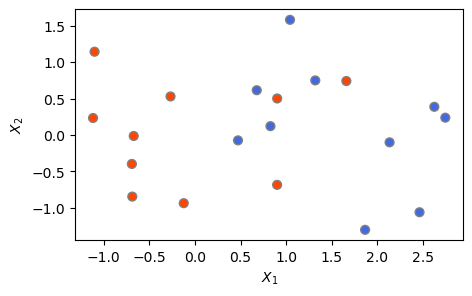

[[ 2.62434536  0.38824359  1.        ]
 [ 0.47182825 -0.07296862  1.        ]
 [ 1.86540763 -1.3015387   1.        ]
 [ 2.74481176  0.2387931   1.        ]
 [ 1.3190391   0.75062962  1.        ]
 [ 2.46210794 -1.06014071  1.        ]
 [ 0.6775828   0.61594565  1.        ]
 [ 2.13376944 -0.09989127  1.        ]
 [ 0.82757179  0.12214158  1.        ]
 [ 1.04221375  1.58281521  1.        ]
 [-1.10061918  1.14472371 -1.        ]
 [ 0.90159072  0.50249434 -1.        ]
 [ 0.90085595 -0.68372786 -1.        ]
 [-0.12289023 -0.93576943 -1.        ]
 [-0.26788808  0.53035547 -1.        ]
 [-0.69166075 -0.39675353 -1.        ]
 [-0.6871727  -0.84520564 -1.        ]
 [-0.67124613 -0.0126646  -1.        ]
 [-1.11731035  0.2344157  -1.        ]
 [ 1.65980218  0.74204416 -1.        ]]


In [3]:
np.random.seed(1)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
# y = 1인 인덱스를 가진 X값에 1을 더함으로써 두 클래스의 X값을 어느 정도 분리시킨다.
X[y == 1] = X[y == 1] + 1

# 데이터 그리기
plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap = ColorMap, edgecolor = 'grey')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

print(np.c_[X, y])

**서포트 벡터 분류기 피팅**

위 결과를 보면 눈으로 보기에도 선형의 초평면(즉 직선)으로 두 클래스를 분리할 수 없다. 실제로 서포트 벡터 분류기가 어떤 결과를 제공하는지 알아보자. 

우리는 [**sklearn SVC**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) 모듈을 사용한다. 사이킷런 `SVC()` 함수에서 파라미터 `C`와 관련하여 한 가지 유의할 점이 있다. 여기에서 `C`의 역할은 우리가 위에서 식 14.15와 관련해 설명한 $C$와 그 역할은 동일하지만, 그 의미는 정반대라는 점이다. 앞에서 식 14.15와 관련해 조정 파라미터 $C$는 마진 위반의 허용 크기를 규정하는 값이다. 즉 $C$가 커(작아)지면 마진 위반에 더 관대(엄격)해져 마진은 더 넓어(좁아)지는 것이다.

그런데 `SVC()` 함수에서의 `C` 파라미터는 마진 위반의 **허용 정도**가 아니라 마진 위반에 대한 **비용**(cost)을 규정하는 값이다. 비용이 크면(작으면) 허용 정도를 낮출(높일) 것이기 때문에 결국 `SVC()` 함수에서의 `C`와 식 14.15의 $C$는 반대 의미를 지닌다. 즉 `SVC()` 함수에서 `C`값을 크게(작게) 설정할 경우, 마진 위반의 비용이 커(작아)지기 때문에 마진 위반에 더 엄격(관대)해지는 것이다. 결국 `C`값이 커(작아)지면 마진이 좁아(넓어)지고 마진 상에 있거나 마진을 위반하는 서포트 벡터가 적어(많아)지게 된다.

서포트 벡터 분류기(`SVC()` 함수)를 훈련 세트(`X` 및 `y`)에 피팅시켜 보자. 선형 커널(`kernel='linear'`)을 사용했으며, `C`를 1로 설정했다(기본값이 1임). 훈련 세트에 대한 피팅 결과를 앞에서 만들어 놓은 `plot_svc()`함수를 사용해 그림으로 그린 것이 아래 나와 있다.

The Number of Support Vectors = 10


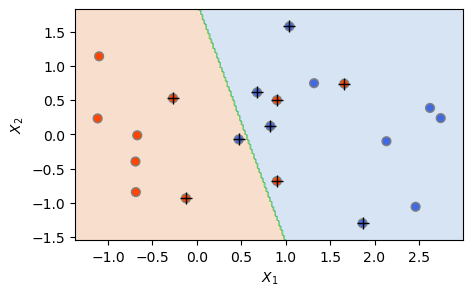

In [4]:
svc = SVC(C= 1, kernel='linear') # SVC 모델을 설정하여 'svc' 이름으로 지정
svc.fit(X, y) # fit() 메서드를 사용하여 모델을 훈련 세트(X 및 y)에 피팅
plot_svc(svc, X, y) # SVC 결과를 그리기
plt.show()

위 그림에서 좌측에 베이지색으로 표시된 영역은 빨간색(레이블: $-1$) 클래스에 해당하는 영역이고, 우측에 하늘색으로 표시된 영역은 파란색(레이블: $+1$) 클래스에 해당하는 영역이다. 두 클래스 사이에 녹색으로 표시된 결정 경계는 (미세한 굴곡이 있어보이지만) `kernel="linear"` 인수를 사용했기 때문에 기본적으로 선형(즉 직선)이다. 관측 중 마진 상에 있거나 마진을 위반한 서포트 벡터에 해당하는 관측들은 동그라미 위에 플러스(+) 표시가 돼있고, 서포트 벡터가 아닌 나머지 관측은 그냥 동그라미로 표시돼 있다.

위 경우에는 10개의 서포트 벡터가 있음을 알 수 있다. `SVC()`의 속성(attribute)인 `support_`를 이용하여 서포트 벡터들의 인덱스를 확인할 수 있다.

In [5]:
svc.support_

array([11, 12, 13, 14, 19,  1,  2,  6,  8,  9])

**혼동 행렬**

혼동행렬(confusion matrix, 분류결과표)은 앞의 7장 "로지스틱 회귀를 이용한 분류"의 부록에서 설명했듯이 관측 중 얼마만큼이 정확하게 분류되었고, 얼마만큼이 잘못 분류되었는지를 표로 정리한 것이다. 

여기에서는 사이킷런(`sklearn`)의 `confusion_matrix()` 함수를 이용해 혼동행렬을 만든다. 아래 결과에서 각 열(column)이 "예측(Predicted)"에 해당하고 각 행(row)이 "실제(True)" 관측에 해당한다. 혼동행렬에서 정확도(accuracy)는 전체 관측 중에서 올바르게 예측된 관측의 비율인데, 아래 결과를 보면 20개 훈련 관측 중 $7+9=16$개(80%)가 올바르게 예측됐다. 따라서 훈련 관측에 있어서의 오분류율은 20%이다.

In [6]:
cm = confusion_matrix(y, svc.predict(X))
cm_df = pd.DataFrame(cm, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted  -1   1
True             
-1          7   3
 1          1   9


**조정 파라미터 `C`값을 줄이는 경우**

조정 파라미터인 `C`값을 1이 아니라 0.1로 더 작게 하면 어떻게 되는지 알아보자. 비용 파라미터의 값이 작아지면, 마진 위반을 더 허용하게 된다. 따라서 마진이 더 넓어지고 서포트 벡터(해당 클래스의 마진 상에 있거나 마진의 잘못된 쪽에 있는 관측들)의 개수가 늘어나는 것을 예상할 수 있다. 아래 결과에서 그것을 확인할 수 있다. 즉 서포트 벡터가 10개에서 16개로 늘었다.

The Number of Support Vectors = 16


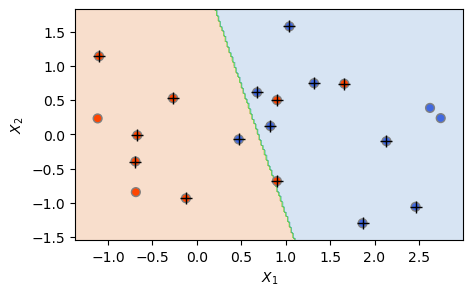

In [7]:
svc2 = SVC(C=0.1, kernel='linear') # SVC 모델을 새롭게 설정하여 'svc2' 이름으로 지정
svc2.fit(X, y) # fit() 메서드를 사용하여 새로운 모델을 훈련 세트(X 및 y)에 피팅
plot_svc(svc2, X, y)
plt.show()

마찬가지로 `C=0.1`에 대해서도 정확도를 구한 결과, 혼동행렬 자체가 앞의 `C=1`의 경우와 정확히 동일한 것으로 나타났다. 서포트 벡터 개수 등은 바뀌었지만, 결정 경계가 거의 바뀌지 않은 것을 위 두 개의 그림 결과에서 확인할 수 있다. 

In [8]:
cm = confusion_matrix(y, svc2.predict(X))
cm_df = pd.DataFrame(cm, index=svc2.classes_, columns=svc2.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted  -1   1
True             
-1          7   3
 1          1   9


**교차검증을 통해 최적 `C`값 구하기**

`sklearn.grid_search` 모듈에는 **교차검증**(cross-validation)을 수행하는 `GridSearchCV()` 함수가 있다(교차검증에 대해서는 앞의 10장 "선형모형 변수선택 및 정규화"의 부록 참조). 이를 이용하여 `SVC()` 함수에서 최적의 `C`값을 구해보자.

우선 `C` 파라미터의 가능한 후보로 7개 값(0.001, 0.01, 0.1, 1, 5, 10, 100)을 선택했다. 그런 다음, 교차검증 모델을 설정하고 이를 `clf`라는 이름으로 지정했다. `SVC()` 함수의 커널은 앞에서와 마찬가지로 `kernel='linear'`를 사용하고, `cv=10`으로 함으로써 10중(10-fold) 교차검증을 선택했다. 즉 훈련 데이터를 10개 폴드로 분할하여 각 폴드(우리 예에서는 전체 훈련 관측이 20개이므로 각 폴드에 2개의 관측이 들어가게 됨)를 "번갈아 가면서" 테스트 세트로 사용하는 방식이다. 성과 측정 기준을 정확도(`scoring='accuracy'`)로 했기 때문에 10개 폴드 각각에 대해 정확도를 측정한 다음, 그 평균값을 기준으로 최고의 성과를 낳는 `C`를 선택하게 된다. 

이런 식으로 설정한 교차검증 모델을 `fit()` 메서드를 사용하여 훈련 세트(`X` 및 `y`)에 피팅하고, `cv_results_` 속성을 이용해 결과를 호출했다.

In [9]:
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, 
                   scoring='accuracy', return_train_score=True) # 교차검증 모델 설정
clf.fit(X, y) # fit() 메서드를 사용하여 모델을 훈련 세트(X 및 y)에 피팅
clf.cv_results_ # 교차검증 결과

{'mean_fit_time': array([0.00083051, 0.00083888, 0.00062394, 0.000738  , 0.00073659,
        0.00063424, 0.00103817]),
 'std_fit_time': array([4.15827801e-04, 4.19940136e-04, 5.09447027e-04, 4.83953625e-04,
        4.82711481e-04, 7.11590865e-04, 2.88318948e-06]),
 'mean_score_time': array([0.00062418, 0.00062423, 0.00084105, 0.00062537, 0.00072985,
        0.00077386, 0.00062351]),
 'std_score_time': array([0.00050964, 0.00050968, 0.00042122, 0.00051063, 0.0004778 ,
        0.0005225 , 0.0005091 ]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False, False],
        fill_value=1e+20),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split1_test_score': array([0., 0., 0., 0., 0., 0., 0.]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 

위에는 교차검증의 제반 결과가 나와 있는데, 이중 `'rank_test_score'` 항목을 보면, 우리가 사용한 7개 조정 파라미터 별로 10중 교차검증으로 구한 정확도 순위가 나와 있는 것을 볼 수 있다. 즉, `array([6, 6, 5, 1, 1, 1, 1]` 부분이다. 이는 7개 `C`값 중 마지막 4개에 해당하는 경우(즉 1, 5, 10, 100)가 정확도 면에서 공동 1위라는 것을 의미한다. 

`GridSearchCV()` 함수의 `best_params_` 속성을 이용하면, 우리가 제공한 7개 조정 파라미터값 중에서 어느 경우에 정확도가 가장 높은지(즉 오류율이 가장 낮은지)를 반환해준다. 언급했듯이 `C`값이 1, 5, 10, 100인 네 가지 경우가 공동으로 1위이지만, 아래 결과에서는 그중에서 순서가 가장 앞선 `C=1`이 반환되었다. 

In [10]:
clf.best_params_ # 베스트 파라미터

{'C': 1}

**테스트 세트에 대한 분류 성과**

지금까지는 정확도(및 오류율)를 평가할 때, 전적으로 훈련 데이터세트를 사용했다. 그러나 보다 중요한 것은 테스트 세트에 대한 분류 성과이다. 이를 위해 우선 테스트 데이터세트를 생성하는 것부터 시작한다. 앞에서 훈련 세트를 생성한 것과 동일한 방식으로 20개 관측으로 이루어진 테스트 세트를 생성했다. 

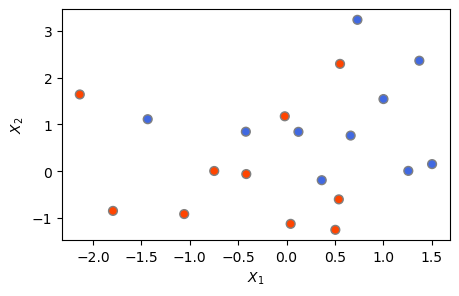

In [11]:
np.random.seed(2)
X_test = np.random.randn(20,2)
y_test = np.repeat([-1,1], 10)
X_test[y_test == 1] = X_test[y_test == 1] + 1

plt.figure(figsize=(5,3))
plt.scatter(X_test[:,0], X_test[:,1], s=40, c=y_test, cmap = ColorMap, 
            edgecolor = 'grey')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

교차검증에서 가장 성과가 우수한 것으로 나온 `C=1`의 서포트 벡터 분류기를 바로 앞에서 생성한 테스트 세트에 적용하여 분류 성과를 평가했다. 아래 결과를 보면 20개 테스트 관측 중 $9+6=15$개(75%)가 올바르게 예측됐다. 따라서 테스트 세트에 있어서의 오분류율은 25%이다.

In [12]:
svc3 = SVC(C=1, kernel='linear')
svc3.fit(X, y)

cm = confusion_matrix(y_test, svc3.predict(X_test))
cm_df = pd.DataFrame(cm, index=svc3.classes_, columns=svc3.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted  -1   1
True             
-1          9   1
 1          4   6


이번에는 `C=1` 대신 `C=0.1`인 서포트 벡터 분류기를 테스트 세트에 적용하여 분류 성과를 평가했다. `C=0.1`인 서포트 벡터 분류기는 위의 10중 교차검증에서 정확도가 다섯 번째에 해당한다. 하지만 아래에서 보듯이 테스트 세트에서는 `C=1`의 경우와 분류 성과가 동일하다. 훈련 세트에서 가장 성과가 좋은 모델이 테스트 세트에서도 그런다는 보장은 없다.

In [13]:
svc = SVC(C=0.1, kernel='linear')
svc.fit(X, y)

cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted  -1   1
True             
-1          9   1
 1          4   6


**최대 마진 분류기 vs. 서포트 벡터 분류기**

앞에서 우리는 실제 데이터세트에서 두 클래스의 관측이 초평면에 의해 완전 분리되는 경우는 많지 않으며, 설사 분리 초평면이 존재하는 경우라도 그것이 분류기로서 반드시 바람직한 것은 아닐 수도 있다는 점을 지적했다. 그런 경우를 예제 데이터로 살펴보자.

우선 앞에서 사용했던 훈련 데이터세트를 약간 변화시켜 분리 초평면이 (가까스로) 가능한 상황을 만들어 보자. `y`값이 1인 훈련 관측들에 대해 $X_1$과 $X_2$에 모두 1.2씩을 더했다. 아래 결과를 보면, 이제는 결정 경계로서 분리 초평면이 가능하다는 것을 알 수 있다. 

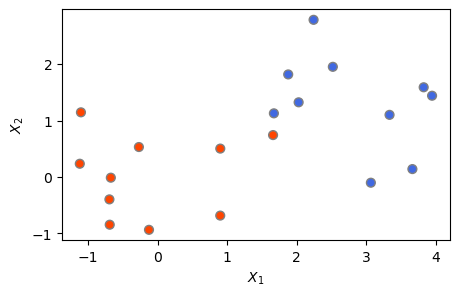

In [14]:
X[y == 1] = X[y == 1] + 1.2

plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap = ColorMap, edgecolor = 'grey')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

먼저 최대 마진 분류기를 도출해보자. 일부러 분리 초평면이 가까스로 가능한 상황을 만들었기 때문에 마진 위반을 엄격하게 해야 분리 초평면이 도출될 수 있다. 따라서 `SVC()` 함수의 비용 파라미터인 `C`를 100이라는 큰 값으로 설정해보았다. 아래 결과를 보면, 분리 초평면을 가진 최대 마진 분류기가 도출됐으며, 서포트 벡터(마진 상에 있거나 마진의 잘못된 쪽에 있는 관측들)의 개수는 3개이다.

The Number of Support Vectors = 3


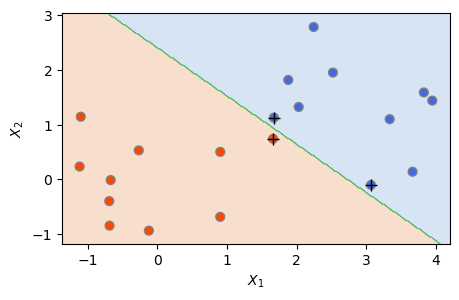

In [15]:
svc4 = SVC(C=100, kernel='linear')
svc4.fit(X, y)
plot_svc(svc4, X, y)
plt.show()

그런데 앞에서도 설명했듯이, 분리 초평면에 기반한 분류기는 모든 훈련 관측을 완벽하게 분류하지만, 이것이 오히려 개별 관측에 대해 너무 민감한 결과로 이어질 수 있다. 위 결과를 보면, 마진이 아주 좁은 것을 알 수 있는데, 훈련 데이터 피팅은 아주 좋지만 분산은 높을 수 있다. 훈련 데이터에 과적합되었을 수 있는 것이다. 

그래서 이번에는 `C=0.1`로 하여 마진 위반을 상당히 허용하는 서포트 벡터 분류기를 도출해보았다. 아래 결과를 보면, 초평면을 위반하는 관측(녹색선 초평면 오른쪽의 빨간색 동그라미)까지 발생한 것을 알 수 있다. 훈련 관측을 잘못 분류하기는 했지만, 훨씬 더 마진이 넓어지고 서포트 벡터가 8개로 늘어났다. 이 `C=0.1` 모델이 앞의 `C=100` 모델보다 테스트 데이터에서 분류 성과가 더 좋을 가능성이 있다.

The Number of Support Vectors = 8


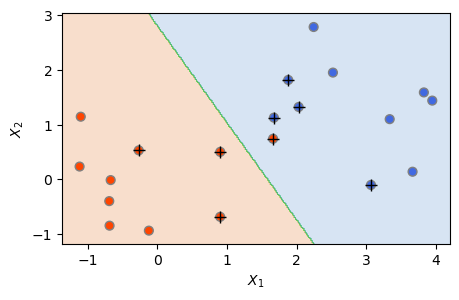

In [16]:
svc5 = SVC(C=0.1, kernel='linear')
svc5.fit(X, y)
plot_svc(svc5, X, y)
plt.show()

### 서포트 벡터 머신

앞 절에서는 분류 경계가 선형인 경우, 즉 서포트 벡터 분류기에 대해 살펴보았는데, 여기에서는 분류 경계가 비선형(non-linear)인 경우, 즉 서포트 벡터 머신(SVM)에 대해 살펴보자. 

**훈련 및 테스트 데이터 생성**

먼저 다음과 같이 비선형 클래스 경계가 있는 훈련 및 테스트 데이터를 생성한다. 앞에서와 마찬가지로 $-1$(빨간색)과 $+1$(파란색)의 2개 클래스가 있으며, 빨간색이 150개, 파란색이 50개 등 총 200개의 관측을 발생시킨 다음, 임의로 절반을 나눠 각각 훈련 세트와 테스트 세트로 삼았다. 일단 전체 200개 관측 데이터를 그림으로 그려본 결과, 클래스 경계가 비선형이라는 것을 눈으로도 확인할 수 있다. 

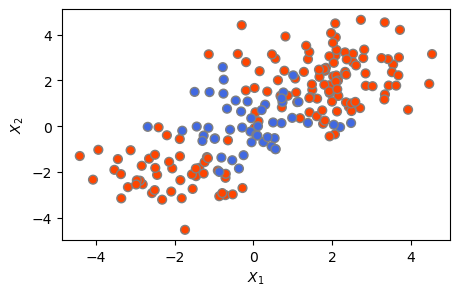

In [17]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] + 2
X[101:150] = X[101:150] - 2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap = ColorMap, edgecolor = 'grey')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

**비선형 커널의 SVM**

분류 경계가 비선형인 서포트 벡터 머신(SVM)을 피팅할 때도 앞의 서포트 벡터 분류기와 마찬가지로 `SVC()` 함수를 사용한다. 단지, 선형 커널(`kernel='linear'`) 대신 비선형 커널을 사용한다는 점이 다르다. 

SVM을 다항식 커널로 피팅하려면 `kernel='poly'`를 사용하고, 방사형 커널로 피팅하려면 `kernel='rbf'`를 사용한다. 전자의 경우, 다항식 커널에 대한 차수(식 14.22의 $d$)를 지정하기 위해서는 `degree` 인수를 사용하고, 후자의 경우 방사형 커널(식 14.24)의 $\gamma$ 파라미터를 지정하기 위해서는 `gamma` 인수를 사용한다. 아래는 피팅 결과이다.

The Number of Support Vectors = 27


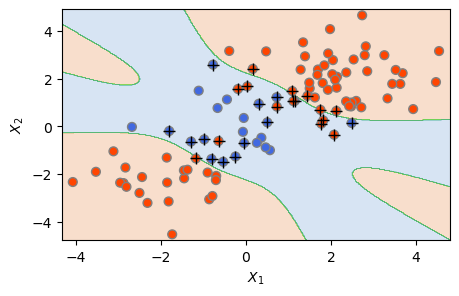

In [18]:
# 다항식 커널
svm1 = SVC(C=100, kernel='poly', degree=6)
svm1.fit(X_train, y_train)
plot_svc(svm1, X_train, y_train)
plt.show()

The Number of Support Vectors = 51


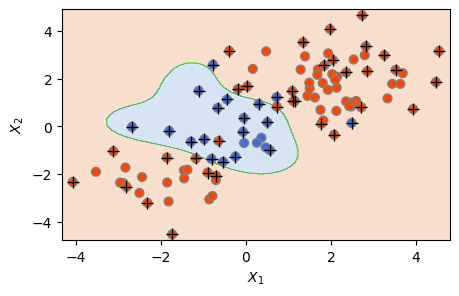

In [19]:
# 방사형 커널
svm2 = SVC(C=1, kernel='rbf', gamma=1)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_train, y_train)
plt.show()

위 결과를 보면, SVM이 비선형 경계를 갖는다는 것을 확실히 알 수 있다. 선형 경계로는 제대로 된 분류가 불가능한 상황에서 비선형 커널을 사용함으로써 상당히 괜찮은 분류 성과를 거두었다. 

**비용 파라미터 값을 높이는 경우**

위 결과를 보면, 비선형 커널을 사용했음에도 불구하고 SVM 피팅에 어느 정도 훈련 오류가 있는데, 비용 파라미터 `C`를 높임으로써 훈련 오류율을 낮추는 것을 시도해볼 수 있다. 

아래에서는 방사형 커널(`kernel='rbf'`) SVM에 대해 `C`값을 1에서 100으로 높여 보았다. 아래 결과를 보면, 결정 경계의 굴곡(유연성)이 더욱 심해졌으며, 서포트 벡터의 개수는 51개에서 36개로 줄어든 것을 알 수 있다. 그림 상으로 보면, 적어도 훈련 데이터에 대해서는 오분류율이 거의 0에 가까운 것으로 보이지만, 이것은 훈련 데이터에 과적합되었을 위험을 높이는 것이기도 하다. 

The Number of Support Vectors = 36


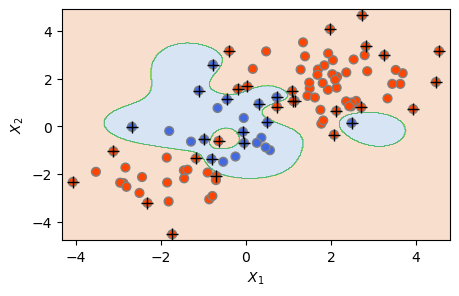

In [20]:
svm3 = SVC(C=100, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)
plot_svc(svm3, X_train, y_train)
plt.show()

**교차검증을 통한 조정 파라미터 선택**

앞에서와 마찬가지로 `sklearn.grid_search` 모듈의 `GridSearchCV()` 함수를 이용하여 적정 파라미터 값을 찾아보자. 즉 교차검증을 통해 방사형 커널(`kernel='rbf'`) SVM에 대해 최적의 `C` 및 `gamma`값을 구해보자.

우선 `C` 파라미터 값으로 0.01, 0.1, 1, 10, 100 등 5개 후보를 두고, `gamma` 파라미터에 대해서도 0.5, 1, 2, 3, 4 등 5개 후보를 설정했다. 총 25개의 조합이 생기게 된다. 그런 다음, 교차검증 모델을 설정하고 이를 `clf`라는 이름으로 지정했다. `SVC()` 함수의 커널을 `kernel='rbf'`로 하고, `cv=10`으로 함으로써 10중(10-fold) 교차검증을 선택했으며, 정확도를 기준으로(`scoring='accuracy'`) 최고의 성과를 낳는 `C` 및 `gamma`의 조합을 찾도록 했다.  

이렇게 설정한 교차검증 모델을 `fit()` 메서드를 사용하여 훈련 세트(`X_train` 및 `y_train`)에 피팅하고, `best_params_` 속성을 이용해 최상의 결과를 낳는 파라미터를 반환시켰다.

In [21]:
# 10중 교차검증을 통한 조정 파라미터 선택
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1, 2, 3, 4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', 
                   return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_
clf.best_params_

{'C': 10, 'gamma': 0.5}

</br> 위 결과를 보면, 2개 파라미터에 대한 총 25가지 조합 중, `C=10`이고 `gamma=0.5`일 때, (훈련 세트에 대한) 분류 정확도가 가장 높은 것으로 나타났다. 이들 인수를 사용한 SVM 분류 결과가 아래 나와 있다. 

The Number of Support Vectors = 32


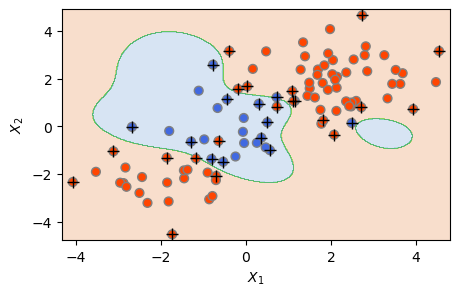

In [22]:
svm4 = SVC(C=10, kernel='rbf', gamma=0.5)
svm4.fit(X_train, y_train)
plot_svc(svm4, X_train, y_train)
plt.show()

훈련 세트에 대한 SVM 피팅 결과를 앞에서 만들어둔 테스트 세트에 적용하여 분류 성과를 혼동행렬로 평가해보았다. 총 100개의 테스트 관측 중 $66+21=87$개가 정확히 예측된 것으로 나타났다. 

In [23]:
# 혼동행렬
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[66,  7],
       [ 6, 21]], dtype=int64)

In [24]:
# 정확도
clf.best_estimator_.score(X_test, y_test)

0.87

### ROC 곡선

**ROC 곡선**은 모델의 분류 성과를 보여주는 그래프이다.(아래 [부록](#부록:-ROC-곡선) 참조) 여기에서는 ROC 곡선을 이용하여 두 가지 SVM 모델의 분류 성능을 비교해보기로 한다.

앞에서 비선형 커널 SVM 피팅에서 사용한 훈련/테스트 데이터를 그대로 사용하여 두 가지 모델에 대해 ROC 곡선을 비교해보기로 한다. 모델은 둘 다 방사형 커널 SVM으로서 `C`값은 1로 동일하게 두고, 단지 `gamma` 인수만 2와 10 두 가지로 달리 해보았다. 두 모델 중 `gamma=10`의 경우가 훨씬 유연한 모델에 속한다. 각 모델에 대해 결정 경계 그림, 훈련 세트 혼동행렬, 테스트 세트 혼동행렬을 구했다.

**모델 1: 방사형 커널 SVM (`gamma=2`)**

The Number of Support Vectors = 68


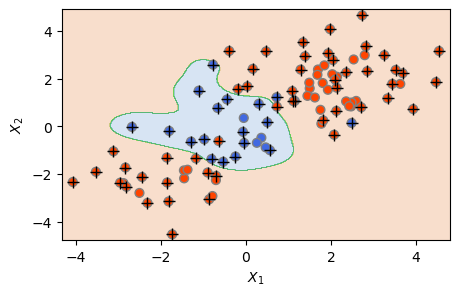

In [25]:
svm5 = SVC(C=1, kernel='rbf', gamma=2)
svm5.fit(X_train, y_train)
plot_svc(svm5, X_train, y_train)
plt.show()

In [26]:
# 훈련 세트 혼동행렬(분류성과표)
cm = confusion_matrix(y_train, svm5.predict(X_train))
cm_df = pd.DataFrame(cm, index=svm5.classes_, columns=svm5.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted  -1   1
True             
-1         76   1
 1          3  20


In [27]:
# 테스트 세트 혼동행렬(분류성과표)
cm = confusion_matrix(y_test, svm5.predict(X_test))
cm_df = pd.DataFrame(cm, index=svm5.classes_, columns=svm5.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted  -1   1
True             
-1         67   6
 1          9  18


**모델 2: 방사형 커널 SVM (`gamma=10`)**

The Number of Support Vectors = 95


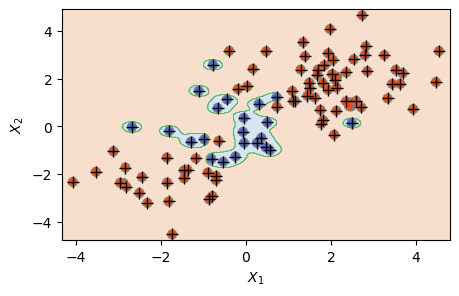

In [28]:
# 모델 1에 비해 더 유연한 모델
svm6 = SVC(C=1, kernel='rbf', gamma=10)
svm6.fit(X_train, y_train)
plot_svc(svm6, X_train, y_train)
plt.show()

In [29]:
# 훈련 세트 혼동행렬(분류성과표)
cm = confusion_matrix(y_train, svm6.predict(X_train))
cm_df = pd.DataFrame(cm, index=svm6.classes_, columns=svm6.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted  -1   1
True             
-1         77   0
 1          1  22


In [30]:
# 테스트 세트 혼동행렬(분류성과표)
cm = confusion_matrix(y_test, svm6.predict(X_test))
cm_df = pd.DataFrame(cm, index=svm6.classes_, columns=svm6.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted  -1   1
True             
-1         69   4
 1         18   9


</br> 위 결과를 보면, 우선 그림 상으로 모델 2의 결정 경계가 모델 1에 비해서 훨씬 굴곡이 심한(즉 유연한) 것을 알 수 있다. 그 결과 모델 2의 경우에는 훈련 관측 대부분(95개)이 서포트 벡터로 사용되어 서포트 벡터 개수 68개인 모델 1과 크게 비교가 된다. 

이처럼 모델 2가 유연성이 높아 훈련 세트에 있어서는 정확도가 거의 99%에 달하지만, 테스트 세트에 있어서는 100개 중 올바로 예측된 것이 $69+9=78$개로서 정확도가 크게 낮아진다. 이에 반해 유연성이 낮은 모델 1은 훈련 세트에 있어서는 정확도가 96%로서 모델 2에 비해 다소 낮으나, 테스트 세트에 있어서는 정확도가 85%로서 모델 2보다 더 높은 것을 알 수 있다.

**ROC 곡선(모델 1 vs. 모델 2)**

ROC 곡선을 그리기 위해서는 우선 주어진 SVM 모델의 적합값이 필요하다. 서포트 벡터 분류기 및 서포트 벡터 머신은 최종적으로 각 관측에 대한 클래스 레이블을 제공한다. 그런데 클래스를 분류하기 위해서는 그것을 판단하는 데 사용되는 숫자 점수인 각 관측에 대한 적합값(fitted value)을 먼저 계산해야 한다. 

서포트 벡터 분류기의 경우, 관측 $X = (X_1,X_2,...,X_p)^T$에 대한 적합값은 $\hat\beta_0  + \hat\beta_1X_1 + \hat\beta_2X_2 + \cdots + \hat\beta_pX_p$이다. 또한 비선형 커널을 사용한 SVM의 경우 식 14.23이 적합값을 산출하는 식이다. 즉  $\beta_0 + \sum_{i \in \mathcal S} \alpha_i K(x, x_{i})$이다. 이 적합값의 부호에 따라 관측이 결정 경계의 어느 쪽에 있는지가 결정된다. 우리 경우에는 적합값이 0보다 크면 관측이 파란색 클래스($+1$ 레이블)에 할당되고, 적합값이 0보다 작으면 빨간색 클래스($-1$ 레이블)에 할당된다. 

SVM 모델의 적합값을 얻으려면 `SVC()` 함수에 `decision_function()` 메서드를 적용하면 된다. 이 적합값을 사용하여 클래스 분류의 분계점을 변화시켜가면서(가령, 분계점을 아주 큰 값에서 시작해서 점차 낮춰가는 식으로 변화시켜가면서) 위양성률(FPR)과 진양성률(TPR)의 변화를 그림으로 그린 것이 ROC 곡선이다. 이 작업을 해주는 것이 `roc_curve()` 함수이다. 이 함수의 괄호 안에는 분류할 데이터세트의 레이블 변수와 적합값을 집어넣는다.

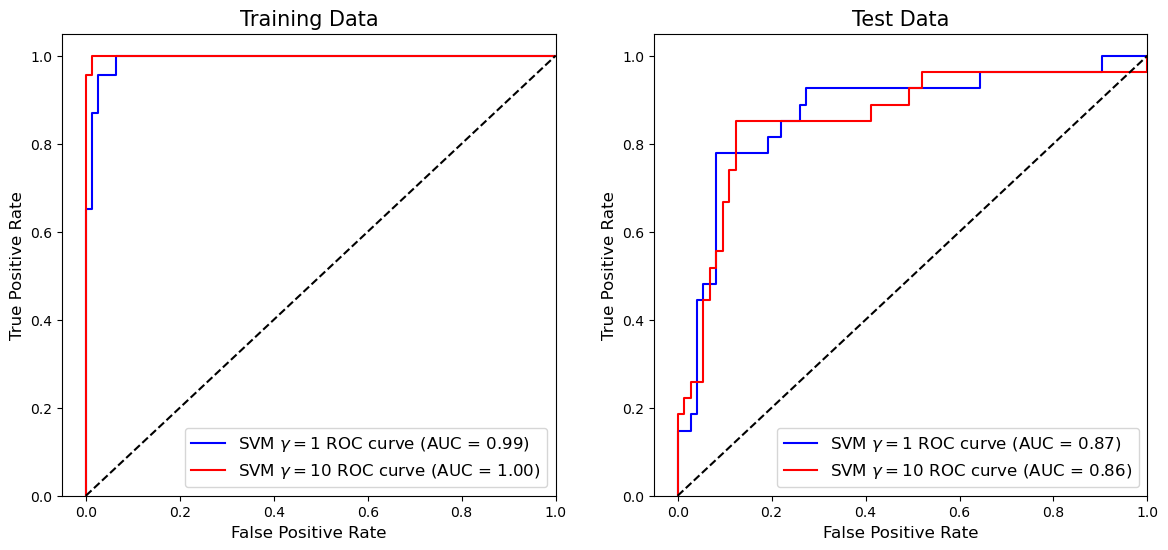

In [31]:
y_train_score5 = svm5.decision_function(X_train)
y_train_score6 = svm6.decision_function(X_train)

false_pos_rate5, true_pos_rate5, _ = roc_curve(y_train, y_train_score5)
roc_auc5 = auc(false_pos_rate5, true_pos_rate5)

false_pos_rate6, true_pos_rate6, _ = roc_curve(y_train, y_train_score6)
roc_auc6 = auc(false_pos_rate6, true_pos_rate6)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate5, true_pos_rate5, 
         label='SVM $\\gamma = 1$ ROC curve (AUC = %0.2f)' % roc_auc5, color='b')
ax1.plot(false_pos_rate6, true_pos_rate6, 
         label='SVM $\\gamma = 10$ ROC curve (AUC = %0.2f)' % roc_auc6, color='r')
ax1.set_title('Training Data', fontsize = 15)

y_test_score5 = svm5.decision_function(X_test)
y_test_score6 = svm6.decision_function(X_test)

false_pos_rate5, true_pos_rate5, _ = roc_curve(y_test, y_test_score5)
roc_auc5 = auc(false_pos_rate5, true_pos_rate5)

false_pos_rate6, true_pos_rate6, _ = roc_curve(y_test, y_test_score6)
roc_auc6 = auc(false_pos_rate6, true_pos_rate6)

ax2.plot(false_pos_rate5, true_pos_rate5, 
         label='SVM $\\gamma = 1$ ROC curve (AUC = %0.2f)' % roc_auc5, color='b')
ax2.plot(false_pos_rate6, true_pos_rate6, 
         label='SVM $\\gamma = 10$ ROC curve (AUC = %0.2f)' % roc_auc6, color='r')
ax2.set_title('Test Data', fontsize = 15)

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize = 12)
    ax.set_ylabel('True Positive Rate', fontsize = 12)
    ax.legend(loc="lower right", fontsize = 12)
plt.show()

</br> 위 ROC 곡선과 AUC(즉 ROC 곡선 아래 영역의 면적) 결과 역시 바로 앞에서 살펴봤던 두 모델의 혼동행렬 결과와 일맥상통하다. 즉 훈련 데이터에 있어서는 유연성이 더 높은 $\gamma=10$ 모델의 분류 성과가 AUC 기준으로 1.00 대 0.99로 약간 더 우수하나, 테스트 데이터에 대해서는 $\gamma=10$ 모델의 분류 성과가 AUC 기준으로 0.86 대 0.87로 약간 더 안 좋은 것으로 나타났다, 

### 다중 클래스 SVM

앞에서 반응변수의 클래스가 2개보다 많은 경우에 SVM의 적용과 관련하여 일대일 분류와 일대전체 분류의 두 가지 접근을 소개했다.(이 장의 4절 참조.) 이 두 가지 접근 중, 사이킷런의 `SVC()` 함수는 일대일 접근 방식을 사용하여 다중 클래스 분류를 수행한다. 우리는 여기에서 클래스가 3개인 데이터세트를 만들어 `SVC()` 함수를 적용해보기로 한다.

우선 클래스가 3개인 데이터세트를 생성한다. 우리는 14.6.2절(서포트 벡터 머신)에서 비선형 클래스 경계가 있는 데이터를 생성한 적이 있는데, 그것에다 하나의 클래스를 추가하기로 한다. 즉 앞에서 이미 만들어 놓은 데이터세트(`X` 및 `y`)는 $−1$(빨간색)과  $+1$(파란색)의 2개 클래스가 있으며, 빨간색이 150개, 파란색이 50개 등 총 200개의 관측이 있다. 여기에다 $0$의 레이블(연두색)을 갖는  관측 50개를 추가하여 총 250개의 관측으로 구성된 데이터세트(`XX` 및 `yy`)를 만들었다.

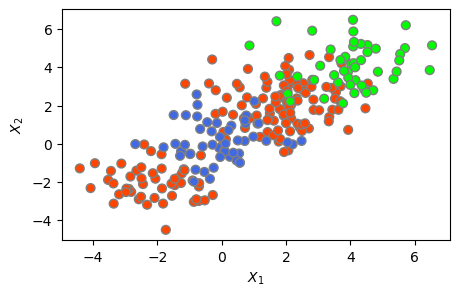

In [32]:
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy==0] = XX[yy==0] + 4

plt.figure(figsize=(5,3))
plt.scatter(XX[:,0], XX[:,1], s=40, c=yy, cmap = ColorMap, edgecolor = 'grey')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

다중 클래스 SVM의 경우에도 `SVC()` 함수를 그대로 사용한다. 다른 옵션을 선택하지 않아도 `SVC()` 함수가 스스로 다중 클래스를 인식하고 피팅을 한다. 

앞에서 언급했듯이 `SVC()` 함수는 일대일 접근 방식으로 다중 클래스를 처리한다. 우리 경우에는 클래스가 3개이므로 이들의 모든 쌍을 비교하는 총 3개의 SVM(즉 빨간색 대 파란색, 빨간색 대 연두색, 파란색 대 연두색)을 구성하는 방식이다. 이렇게 총 3개의 분류기를 사용하여 각 관측을 분류한 다음, 각 관측별로 각 클래스에 할당된 횟수를 집계하여 가장 많이 할당된 클래스로 해당 관측을 최종 분류한다. 이 모든 과정을 `SVC()` 함수가 알아서 진행하기 때문에 이와 관련해 다른 코딩이 필요없다.

여기에서는 방사형 커널(`kernel='rbf'`)을 사용했다. 앞에서와 달리 `gamma` 인수를 지정하지 않았는데, 이럴 경우 기본값(default)으로 `gamma='scale'`이 사용된다. 여기에서 `'scale'`은 (n_features * X.var())$^{-1}$을 의미한다. n_feature는 입력변수의 개수(우리 예에서는 2개)이고, X.var()는 입력변수의 모든 값, 즉 flattened 배열(array)에 대해 모분산값을 구한 것이다. 이 두 개 값을 곱해서 역수를 취한 것이 `gamma`값으로 사용된다. 

The Number of Support Vectors = 128


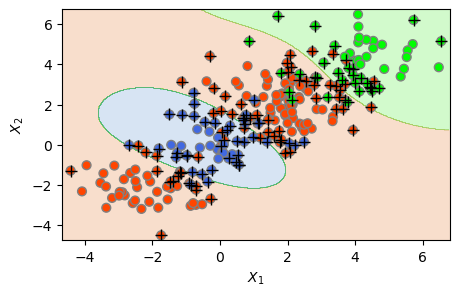

In [33]:
svm7 = SVC(C=1, kernel='rbf')
svm7.fit(XX, yy)
plot_svc(svm7, XX, yy)
plt.show()

</br> 위 결과를 보면, 이제는 클래스가 3개라서 분류 영역 역시 3개인 것을 알 수 있다. 즉 우측 윗부분에 연두색 영역이 새로 생겼는데, 관측이 여기에 속할 경우, 연두색($레이블=0$) 클래스로 분류되는 것이다. 

방사형 커널을 사용한 SVM 분류 결과가 그런대로 괜찮은 편으로 여겨진다. 아래 혼동행렬을 구했는데, 총 250개 훈련 관측중 클래스가 올바로 분류된 관측이 $133+42+38=213$개로서 정확도가 85.2%이다.

In [34]:
cm = confusion_matrix(yy, svm7.predict(XX))
cm_df = pd.DataFrame(cm, index=svm7.classes_, columns=svm7.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted   -1   0   1
True                  
-1         133   6  11
 0           8  42   0
 1          12   0  38


## 14.8 서포트 벡터 분류 사례

### 데이터세트

여기에서 사용할 데이터세트는 Khan 등(2001)의 연구에서 사용된 데이터로 4가지 유형의 SRBCT(소형 원형 청색 세포 종양)에 관한 것이다. 총 83개의 조직(tissue) 샘플에 대해 2,308개의 유전자 발현값(`x` 변수)과 종양의 종류(`y` 변수)를 기록한 것이다. 전체 83개 관측 중 63개를 훈련 세트(`X_train`, `y_train`)로 사용하고, 나머지 20개 관측은 테스트 세트(`X_test`, `y_test`)이다. 분류 클래스는 4개 종양 유형이고, 분류 모델의 목표는 어떤 조직 샘플이 주어질 때, 2,308개의 유전자 발현 특성을 사용해 해당 관측의 종양 유형을 잘 예측하는 것이다.

먼저 인터넷에서 데이터 파일을 불러들이고, 데이터세트의 형태를 파악한다.

In [35]:
url_X_train = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Khan_xtrain.csv"
url_y_train = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Khan_ytrain.csv"
url_X_test = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Khan_xtest.csv"
url_y_test = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Khan_ytest.csv"

In [36]:
# 훈련 세트
X_train = pd.read_csv(url_X_train).drop('Unnamed: 0', axis=1)
y_train = pd.read_csv(url_y_train).drop('Unnamed: 0', axis=1).values.ravel()
# 테스트 세트
X_test = pd.read_csv(url_X_test).drop('Unnamed: 0', axis=1)
y_test = pd.read_csv(url_y_test).drop('Unnamed: 0', axis=1).values.ravel()

In [37]:
# 데이터세트 형태
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((63, 2308), (63,), (20, 2308), (20,))

In [38]:
# 훈련 세트 입력변수 프린트
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2299,V2300,V2301,V2302,V2303,V2304,V2305,V2306,V2307,V2308
0,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.238511,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172
1,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.657394,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395
2,-0.084469,-1.649739,-0.241308,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,-0.696352,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434
3,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.259746,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483
4,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,-0.200404,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966


In [39]:
# 훈련 세트 반응변수 프린트
y_train

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [40]:
# 훈련 세트 클래스별 관측 개수
pd.Series(y_train).value_counts(sort=False)

2    23
4    20
3    12
1     8
Name: count, dtype: int64

In [41]:
# 테스트 세트 클래스별 관측 개수
pd.Series(y_test).value_counts(sort=False)

3    6
2    6
4    5
1    3
Name: count, dtype: int64

### 선형 커널 서포트 벡터 분류

우리는 유전자 발현값을 사용하여 종양의 유형을 예측하기 위해 서포트 벡터 접근 방식을 사용한다. 그런데 이 데이터세트에는 관측 개수(63개)에 비해 매우 많은 수(2,308개)의 특성이 있다. 이것은 굳이 다항식 또는 방사형 커널을 사용하여 모델의 유연성을 높일 필요 없이 선형 커널로도 충분하다는 것을 시사한다.

`SVC()` 함수를 사용했으며, 선형 커널(`kernel='linear'`)을 지정했다. 조정 파라미터는 기본값(`C=1`)을 사용했는데, 이를 달리해도 결과가 거의 영향을 받지 않는다. 아래 결과를 보면, 서포트 벡터가 54개인 것을 알 수 있다.

In [42]:
svc = SVC(C=1, kernel='linear')
svc.fit(X_train, y_train)
svc.support_.size

54

</br> 앞의 서포트 벡터 분류 결과를 바탕으로 훈련 세트와 테스트 세트에 대해 각각 혼동행렬을 만들었다. 아래 결과를 보면, 훈련 세트에 대해서는 오분류율이 0이다. 정확도가 100%인 것이다. 단, 테스트 세트에 대해서는 총 20개 관측 중 2개가 잘못되어 오분류율이 10%이다.

In [43]:
# 훈련 세트 혼동행렬
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted  1   2   3   4
True                    
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20


In [44]:
# 테스트 세트 혼동행렬
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'True'
cm_df.columns.name = 'Predicted'
print(cm_df)

Predicted  1  2  3  4
True                 
1          3  0  0  0
2          0  6  0  0
3          0  2  4  0
4          0  0  0  5


## 부록: ROC 곡선

**ROC 곡선은 모델의 분류 성능을 보여주는 그래프**이다. ROC(receiver operating characteristic: 수신자 조작 특성)라는 특이한 이름을 가진 이유는 이것이 신호탐지이론(Signal detection theory)에서 개발되었기 때문이다. 

ROC 곡선은 어떤 분류 모델에 있어서 분류 분계점(threshold)이 달라짐에 따라 해당 모델의 위양성률(가로축)과 진양성률(세로축)이 어떻게 변하는지를 보여주는 곡선이다(아래 그림 참조). **위양성률**(FPR: false positive rate)은 실제 음성인데, 양성으로 잘못 예측된 관측의 비율이고, **진양성률**(TPR: true positive rate)은 재현율(recall) 또는 민감도(sensitivity)라고도 하는데, 실제 양성 관측들 중 양성으로 제대로 예측된 관측의 비율이다. 

위양성률과 진양성률 모두 0에서 1까지의 값을 가질 수 있는데, 위양성률의 경우 (잘못 예측된 비율이기 때문에) 이 값이 0에 가까울수록 분류 성능이 좋은 반면, 진양성률은 (제대로 예측된 비율이기 때문에) 이 값이 1에 가까울수록 좋은 모델이다. 따라서 아래 그림의 ROC 평면에서 왼쪽 상단의 파란색 점("Perfect classifier")이 분류 성과가 가장 좋은 분류기를 의미한다. 이 파란색 점에서 위양성률은 0이고 진양성률은 1이기 때문이다. 

아래 그림에는 네 가지 ROC 곡선이 그려져 있다. 이 중에서 파란색의 ROC 곡선이 가장 좋은 분류기(또는 분류 모델)이고, 그 다음이 연두색, 오렌지색, 빨간색(점선) 순이다. 즉 왼쪽 상단의 파란색 점(완벽한 분류기)에 가까울수록 분류 성능이 좋은 모델인 것이다. 

아래 그림에서는 네 가지 ROC 곡선에 서로 겹치는 부분이 없어서 분류 모델의 성능을 눈으로도 쉽게 평가할 수 있지만, 실제로는 곡선들이 서로 겹치는 경우가 있을 것이기 때문에 그런 경우에 있어서 분류 성능을 평가하는 기준을 마련할 필요가 있다. 그것이 바로 **AUC**(area under curve)로서 **ROC 곡선 아래 영역의 면적**을 의미한다. 아래 그림에서 "Perfect classifier"의 AUC는 1로서 최대값이며, 파란색 ROC 곡선은 AUC가 (눈으로 보기에) 대략 0.95 정도이다. 

![ROC 곡선](https://raw.githubusercontent.com/pilsunchoi/images/main/14-12.png)

- 그림 출처: Wikipedia, "[Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)".

ROC 곡선을 그리는 방법은 분계점을 변화시켜가면서 표본 관측들의 위양성률(FPR)과 진양성률(TPR)을 계산하여 이를 ROC 평면에 표시하면 된다. 가령 코로나19 진단 키트를 생각해보자. 만약 음성을 양성으로 잘못 분류하는 위양성자(즉 false alarm)가 절대 나오지 않게 하려면, 양성 판정 기준(이를 분계점이라 부름)을 극도로 엄격하게 하면 된다. 물론 이럴 경우 양성을 양성으로 제대로 분류하는 진양성률 역시 낮아질 가능성이 있다. 아무튼 FPR를 0으로 만드는 분계점에 대해 TPR이 어느 수준인지를 파악한 것에서 출발하여, 점진적으로 분계점을 조금씩 완화해가면서 FPR과 TPR이 어떻게 바뀌는지를 기록하여 ROC 평면에 그리면 된다. 